# WiDS Datathon 

# Dataset Explanation
#### This dataset consists of building features which are influental for Site Energy Usage Intensity (Site EUI). The task is to predict the Site EUI for each row, given the characteristics of the building and the weather data for the location of the building.
* id: building id

* Year_Factor: anonymized year in which the weather and energy usage factors were observed

* State_Factor: anonymized state in which the building is located

* building_class: building classification

* facility_type: building usage type

* floor_area: floor area (in square feet) of the building

* year_built: year in which the building was constructed

* energy_star_rating: the energy star rating of the building

* ELEVATION: elevation of the building location

* january_min_temp: minimum temperature in January (in Fahrenheit) at the location of the building

* january_avg_temp: average temperature in January (in Fahrenheit) at the location of the building

* january_max_temp: maximum temperature in January (in Fahrenheit) at the location of the building

* cooling_degree_days: cooling degree day for a given day is the number of degrees where the daily average temperature exceeds 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

* heating_degree_days: heating degree day for a given day is the number of degrees where the daily average temperature falls under 65 degrees Fahrenheit. Each month is summed to produce an annual total at the location of the building.

* precipitation_inches: annual precipitation in inches at the location of the building

* snowfall_inches: annual snowfall in inches at the location of the building

* snowdepth_inches: annual snow depth in inches at the location of the building

* avg_temp: average temperature over a year at the location of the building

* days_below_30F: total number of days below 30 degrees Fahrenheit at the location of the building

* days_above_80F: total number of days above 80 degrees Fahrenheit at the location of the building

* direction_max_wind_speed: wind direction for maximum wind speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

* direction_peak_wind_speed: wind direction for peak wind gust speed at the location of the building. Given in 360-degree compass point directions (e.g. 360 = north, 180 = south, etc.).

* max_wind_speed: maximum wind speed at the location of the building

* days_with_fog: number of days with fog at the location of the building


## Setting up the environment

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot  as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import LocalOutlierFactor
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/Downloads/widsdatathon2022/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        # Veri setindeki hata göstergelerinin gizlenmesi için aşağıdaki işlem uygulanmıştır.

from warnings import filterwarnings
filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Loading datasets

In [2]:
train_df=pd.read_csv("Downloads/widsdatathon2022/train.csv")
test_df=pd.read_csv("Downloads/widsdatathon2022/test.csv")

## Gaining insight about the data

In [3]:
train_df.head()



,Year_Factor,State_Factor,building_class,facility_type,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,State_1,Commercial,Grocery_store_or_food_market,61242.0,1942.0,11.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,State_1,Commercial,Warehouse_Distribution_or_Shipping_center,274000.0,1955.0,45.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,State_1,Commercial,Retail_Enclosed_mall,280025.0,1951.0,97.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,State_1,Commercial,Education_Other_classroom,55325.0,1980.0,46.0,1.8,36,50.5,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,State_1,Commercial,Warehouse_Nonrefrigerated,66000.0,1985.0,100.0,2.4,36,50.5,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4


### Shapes of the train and test datasets
####  *There are 64 columns in train dataset and 63 columns in test dataset. Test dataset doesn't have site_eui column.*

In [4]:
train_df.shape

(75757, 64)

In [5]:
test_df.shape

(9705, 63)

### Distribution of the columns
#### *There are 24 float values, 37 integer values and 3 objects in the train dataset.*

In [6]:

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75757 entries, 0 to 75756
Data columns (total 64 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year_Factor                75757 non-null  int64  
 1   State_Factor               75757 non-null  object 
 2   building_class             75757 non-null  object 
 3   facility_type              75757 non-null  object 
 4   floor_area                 75757 non-null  float64
 5   year_built                 73920 non-null  float64
 6   energy_star_rating         49048 non-null  float64
 7   ELEVATION                  75757 non-null  float64
 8   january_min_temp           75757 non-null  int64  
 9   january_avg_temp           75757 non-null  float64
 10  january_max_temp           75757 non-null  int64  
 11  february_min_temp          75757 non-null  int64  
 12  february_avg_temp          75757 non-null  float64
 13  february_max_temp          75757 non-null  int

## Finding null values


In [7]:
null_values=train_df.isnull().sum().to_frame()

In [8]:
null_values.columns=["count"]

In [9]:
null_values=null_values.loc[null_values["count"]!=0]

### Bar Plot for number of null values
##### This graph lets us see the columns with null values. There are 6 columns that have null values. Besides year_built, the other columns have a huge rate of null values

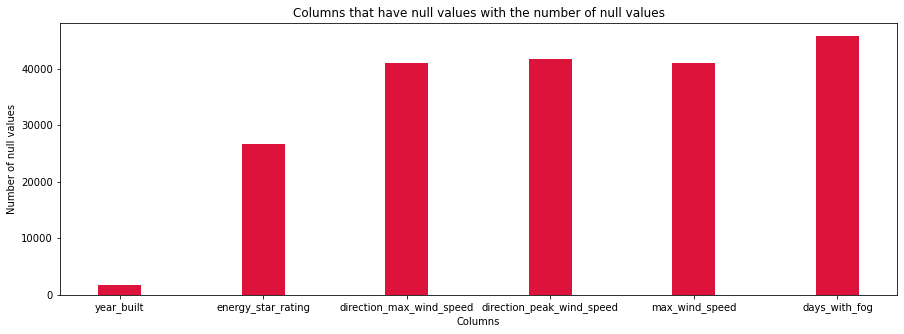

In [10]:
fig = plt.figure(figsize = (15, 5))
 
# creating the bar plot
plt.bar(null_values.index, null_values["count"], color ='crimson',
        width = 0.3)
 
plt.xlabel("Columns")
plt.ylabel("Number of null values")
plt.title("Columns that have null values with the number of null values")
plt.show()

## Statistical Information on the Columns
##### Year factor seems to have very few amount of values. In year_built the minimum value is 0, but that's not possible so we might think that those columns are null.

In [11]:
train_df.describe()

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
count,75757.000000,7.575700e+04,73920.000000,49048.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,75757.000000,...,75757.000000,75757.000000,75757.000000,75757.000000,34675.000000,33946.000000,34675.000000,29961.000000,75757.000000,75757.000000
mean,4.367755,1.659839e+05,1952.306764,61.048605,39.506323,11.432343,34.310468,59.054952,11.720567,35.526837,...,82.709809,14.058701,0.279539,0.002442,66.552675,62.779974,4.190601,109.142051,82.584693,37878.000000
std,1.471441,2.468758e+05,37.053619,28.663683,60.656596,9.381027,6.996108,5.355458,12.577272,8.866697,...,25.282913,10.943996,2.252323,0.142140,131.147834,130.308106,6.458789,50.699751,58.255403,21869.306509
min,1.000000,9.430000e+02,0.000000,0.000000,-6.400000,-19.000000,10.806452,42.000000,-13.000000,13.250000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000,1.001169,0.000000
25%,3.000000,6.237900e+04,1927.000000,40.000000,11.900000,6.000000,29.827586,56.000000,2.000000,31.625000,...,72.000000,6.000000,0.000000,0.000000,1.000000,1.000000,1.000000,88.000000,54.528601,18939.000000
50%,5.000000,9.136700e+04,1951.000000,67.000000,25.000000,11.000000,34.451613,59.000000,9.000000,34.107143,...,84.000000,12.000000,0.000000,0.000000,1.000000,1.000000,1.000000,104.000000,75.293716,37878.000000
75%,6.000000,1.660000e+05,1977.000000,85.000000,42.700000,13.000000,37.322581,62.000000,20.000000,40.879310,...,97.000000,17.000000,0.000000,0.000000,1.000000,1.000000,1.000000,131.000000,97.277534,56817.000000
max,6.000000,6.385382e+06,2015.000000,100.000000,1924.500000,49.000000,64.758065,91.000000,48.000000,65.107143,...,260.000000,185.000000,119.000000,16.000000,360.000000,360.000000,23.300000,311.000000,997.866120,75756.000000


## Numerical and Categorical Columns

In [12]:
num_cols=train_df.select_dtypes(include=["int64","float"])
num_list=list(num_cols.columns)


#### Searching for categorical columns that are labeled as numerical
*Year factor seems like it's categorical, there are 6 categories in it.*

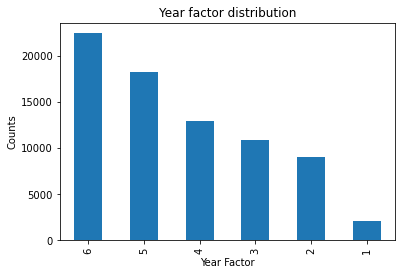

In [13]:
train_df["Year_Factor"].value_counts().plot(kind="bar")
plt.xlabel("Year Factor")
plt.ylabel("Counts")
plt.title("Year factor distribution")
plt.show()

In [14]:
train_df["Year_Factor"]=train_df["Year_Factor"].astype("object")

In [15]:
for col in train_df.columns:
    print(f"{col}: {train_df[col].nunique()}")

Year_Factor: 6
State_Factor: 7
building_class: 2
facility_type: 60
floor_area: 20433
year_built: 180
energy_star_rating: 101
ELEVATION: 193
january_min_temp: 59
january_avg_temp: 165
january_max_temp: 49
february_min_temp: 53
february_avg_temp: 168
february_max_temp: 43
march_min_temp: 54
march_avg_temp: 166
march_max_temp: 42
april_min_temp: 36
april_avg_temp: 164
april_max_temp: 33
may_min_temp: 35
may_avg_temp: 165
may_max_temp: 39
june_min_temp: 36
june_avg_temp: 162
june_max_temp: 43
july_min_temp: 31
july_avg_temp: 161
july_max_temp: 41
august_min_temp: 31
august_avg_temp: 167
august_max_temp: 42
september_min_temp: 36
september_avg_temp: 165
september_max_temp: 39
october_min_temp: 39
october_avg_temp: 168
october_max_temp: 37
november_min_temp: 44
november_avg_temp: 160
november_max_temp: 38
december_min_temp: 43
december_avg_temp: 163
december_max_temp: 39
cooling_degree_days: 162
heating_degree_days: 170
precipitation_inches: 171
snowfall_inches: 71
snowdepth_inches: 60
avg_t

In [16]:
col_list= list(train_df.columns)
cat_cols=[item for item in col_list if item not in num_list ]

In [17]:
cat_cols.append("Year_Factor")

In [18]:
num_cols

,Year_Factor,floor_area,year_built,energy_star_rating,ELEVATION,january_min_temp,january_avg_temp,january_max_temp,february_min_temp,february_avg_temp,...,days_above_80F,days_above_90F,days_above_100F,days_above_110F,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog,site_eui,id
0,1,61242.0,1942.0,11.0,2.4,36,50.500000,68,35,50.589286,...,14,0,0,0,1.0,1.0,1.0,NaN,248.682615,0
1,1,274000.0,1955.0,45.0,1.8,36,50.500000,68,35,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,26.500150,1
2,1,280025.0,1951.0,97.0,1.8,36,50.500000,68,35,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,24.693619,2
3,1,55325.0,1980.0,46.0,1.8,36,50.500000,68,35,50.589286,...,14,0,0,0,1.0,NaN,1.0,12.0,48.406926,3
4,1,66000.0,1985.0,100.0,2.4,36,50.500000,68,35,50.589286,...,14,0,0,0,1.0,1.0,1.0,NaN,3.899395,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,6,20410.0,1995.0,8.0,36.6,28,43.451613,56,34,47.672414,...,25,3,0,0,NaN,NaN,NaN,NaN,132.918411,75752
75753,6,40489.0,1910.0,98.0,36.6,28,43.451613,56,34,47.672414,...,25,3,0,0,NaN,NaN,NaN,NaN,39.483672,75753
75754,6,28072.0,1917.0,NaN,36.6,26,36.612903,48,30,41.637931,...,6,0,0,0,NaN,NaN,NaN,NaN,48.404398,75754
75755,6,53575.0,2012.0,NaN,36.6,26,36.612903,48,30,41.637931,...,6,0,0,0,NaN,NaN,NaN,NaN,592.022750,75755


In [19]:
num_cols.drop("id",axis=1,inplace=True)

In [20]:
num_cols.drop("Year_Factor",axis=1,inplace=True)

In [21]:
num_list=list(num_cols.columns)

In [22]:
cat_cols

['State_Factor', 'building_class', 'facility_type', 'Year_Factor']

### Bar plot for categorical columns' value counts
##### The distribution of values are not propotional apart from building class. In state factor feature most of the values belong to State 6. And the rest is distributed to the others. In facility type there are some classes that has more values and other classes has very few amount of values. Year factor feature's value counts are increasing according to the class.

In [23]:
df_list=[]
for col in cat_cols:
    df=train_df[col].value_counts().to_frame()
    df.columns=["count"]
    df.index.names = ['Name']
    df['Name'] = df.index
    
    df_list.append(df)

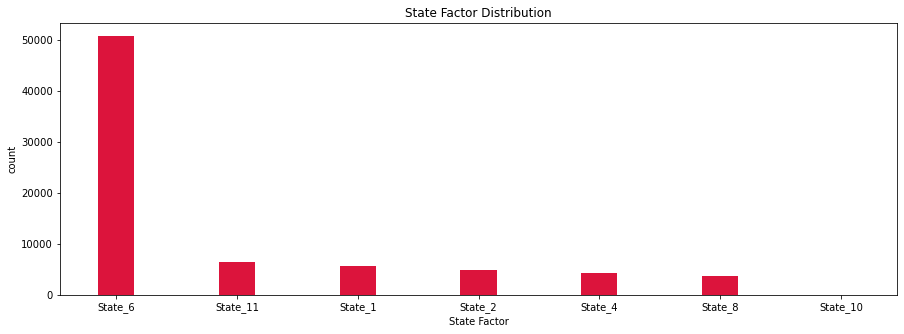

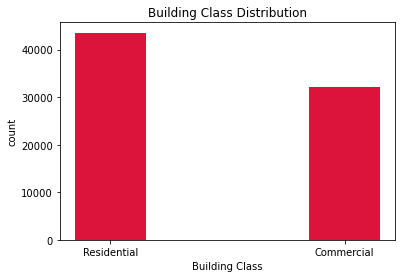

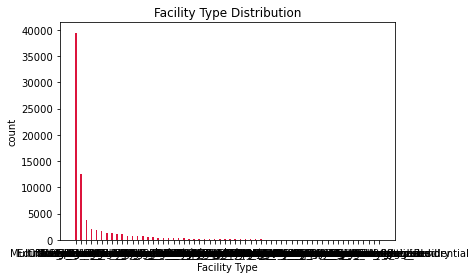

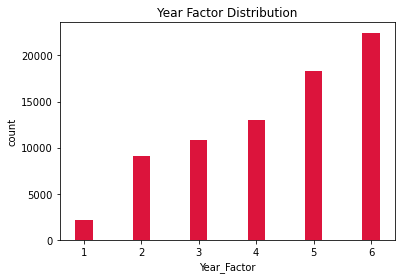

In [24]:
xlabels=["State Factor","Building Class","Facility Type","Year_Factor"]
titles=["State Factor Distribution","Building Class Distribution","Facility Type Distribution","Year Factor Distribution"]
fig = plt.figure(figsize = (15, 5))

# creating the bar plot
for i, df in enumerate(df_list):
    plt.bar(df["Name"], df["count"], color="crimson",
            width = 0.3)
    plt.xlabel(xlabels[i])
    plt.title(titles[i])
    plt.ylabel("count")
    plt.show()

## Histogram of Site EUI
#### Most of the Site EUI is gathered around 70. Only a small number of buildings go more than 200

In [25]:
train_df["site_eui"].describe()

count    75757.000000
mean        82.584693
std         58.255403
min          1.001169
25%         54.528601
50%         75.293716
75%         97.277534
max        997.866120
Name: site_eui, dtype: float64

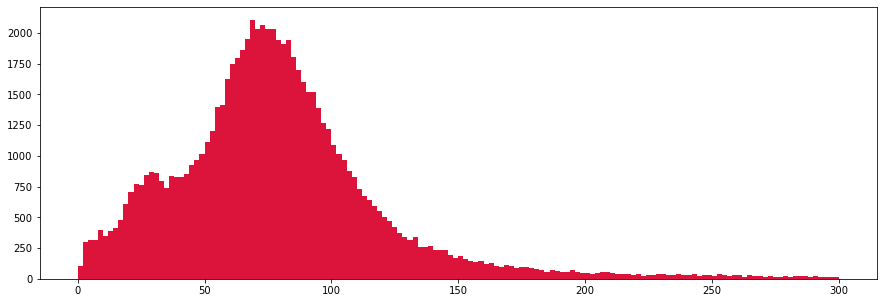

In [26]:
fig = plt.figure(figsize = (15, 5))
plt.hist(train_df["site_eui"],bins=150,color="crimson",range=[0,300])

#binleri neye göre seçiyoruz
plt.show()

##  Mean Site EUI value in each State Factor category.
##### The highest Site EUI score is in state 4. The state the building is placed in can affect the site eui score.

In [27]:
train_df.groupby("State_Factor")["site_eui"].mean()
#")

State_Factor
State_1     62.196194
State_10    68.597082
State_11    53.989234
State_2     77.873978
State_4     95.199291
State_6     87.481012
State_8     87.416018
Name: site_eui, dtype: float64

<AxesSubplot:xlabel='State_Factor', ylabel='site_eui'>

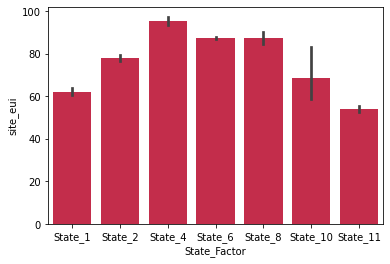

In [28]:
sns.barplot(x="State_Factor",y="site_eui",data=train_df,color="crimson")

## Site Eui by Building Type
##### I wanted to see if the building type has an effect on the Site EUI score. It doesn't seem to have an impact.

<AxesSubplot:xlabel='building_class', ylabel='site_eui'>

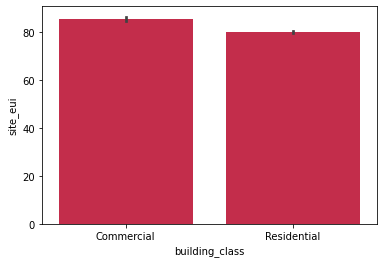

In [29]:
train_df.groupby("building_class")["site_eui"].mean()
sns.barplot(x="building_class",y="site_eui",data=train_df,color="crimson")

## Site EUI by year built
##### I wondered if the year that the building was built in had an effect on the site EUI score. It does not look like there is a pattern.

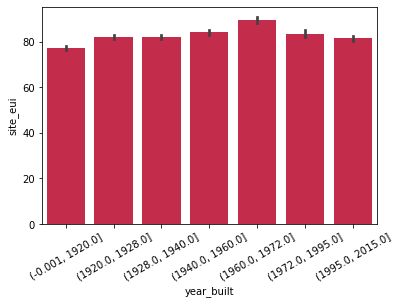

In [30]:
#train_df.groupby(train_df["year_categories"]=pd.qcut(train_df['year_built'], q=7))["site_eui"].mean()
sns.barplot(x=pd.qcut(train_df['year_built'], q=7),y="site_eui",data=train_df,color="crimson")
plt.xticks(rotation=30)
plt.show()

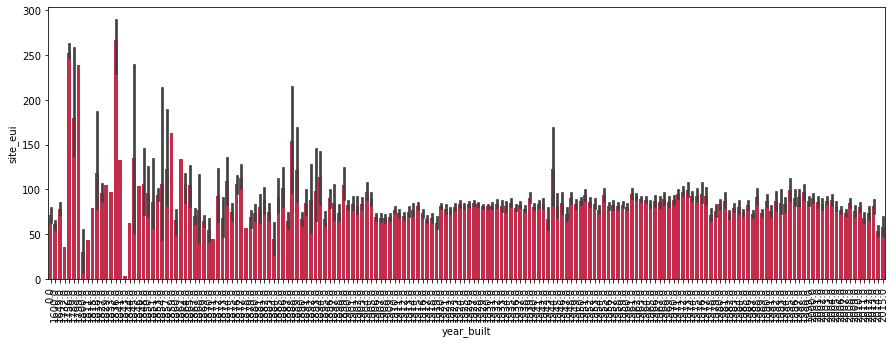

In [31]:
fig = plt.figure(figsize = (15, 5))
sns.barplot(x="year_built",y="site_eui",data=train_df,color="crimson")
plt.xticks(rotation=90)
plt.show()

## Site EUI by Energy Star Rating
##### Energy star rating is a score similar to site EUI. I expected it to be negatively correlated with site EUI. As we can see in the graph below, when the energy star rating increases, site EUI score decreases. 

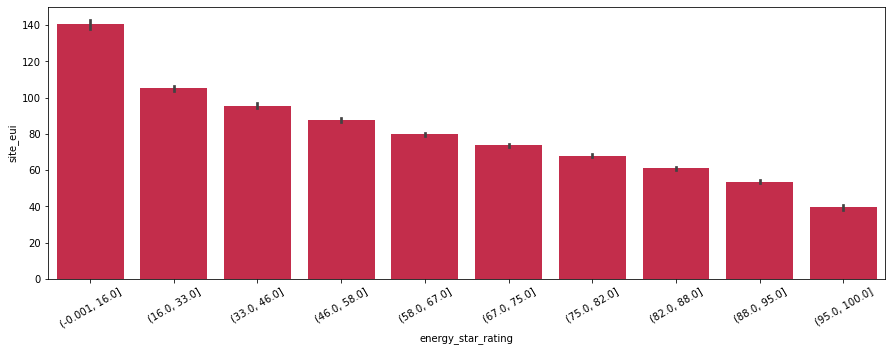

In [32]:
#train_df.groupby("energy_star_categories")["site_eui"].mean()
fig = plt.figure(figsize = (15, 5))
sns.barplot(x=pd.qcut(train_df['energy_star_rating'], q=10),y="site_eui",data=train_df,color="crimson")
plt.xticks(rotation=30)
plt.show()

## Site EUI relationship with the temperature of the region
##### It seems like the Site EUI score is related to the heat. When the area is colder, the amount of energy spent increases and that increases site EUI too.

<AxesSubplot:xlabel='january_min_temp', ylabel='site_eui'>

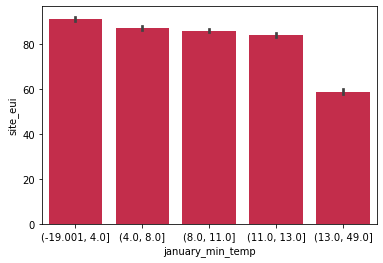

In [33]:

sns.barplot(x=pd.qcut(train_df["january_min_temp"], q=5),y="site_eui",data=train_df,color="crimson")

In [34]:
#?

<AxesSubplot:xlabel='march_avg_temp', ylabel='site_eui'>

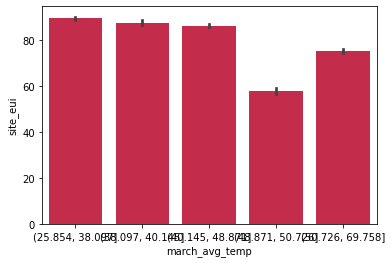

In [35]:

sns.barplot(x=pd.qcut(train_df["march_avg_temp"], q=5),y="site_eui",data=train_df,color="crimson")

## Checking Duplicated Data 
* No duplicated data in both training and test datasets

In [36]:
train_df.duplicated().value_counts()

False    75757
dtype: int64

In [37]:
test_df.duplicated().value_counts()

False    9705
dtype: int64

## Correlation Analysis
##### Correlation analysis in research is a statistical method used to measure the strength of the linear relationship between two variables and compute their association. Correlation analysis calculates the level of change in one variable due to the change in the other. A high correlation points to a strong relationship between the two variables, while a low correlation means that the variables are weakly related. There is a positive correlation between two variables when an increase in one variable leads to the increase in the other. On the other hand, a negative correlation means that when one variable increases, the other decreases and vice-versa.



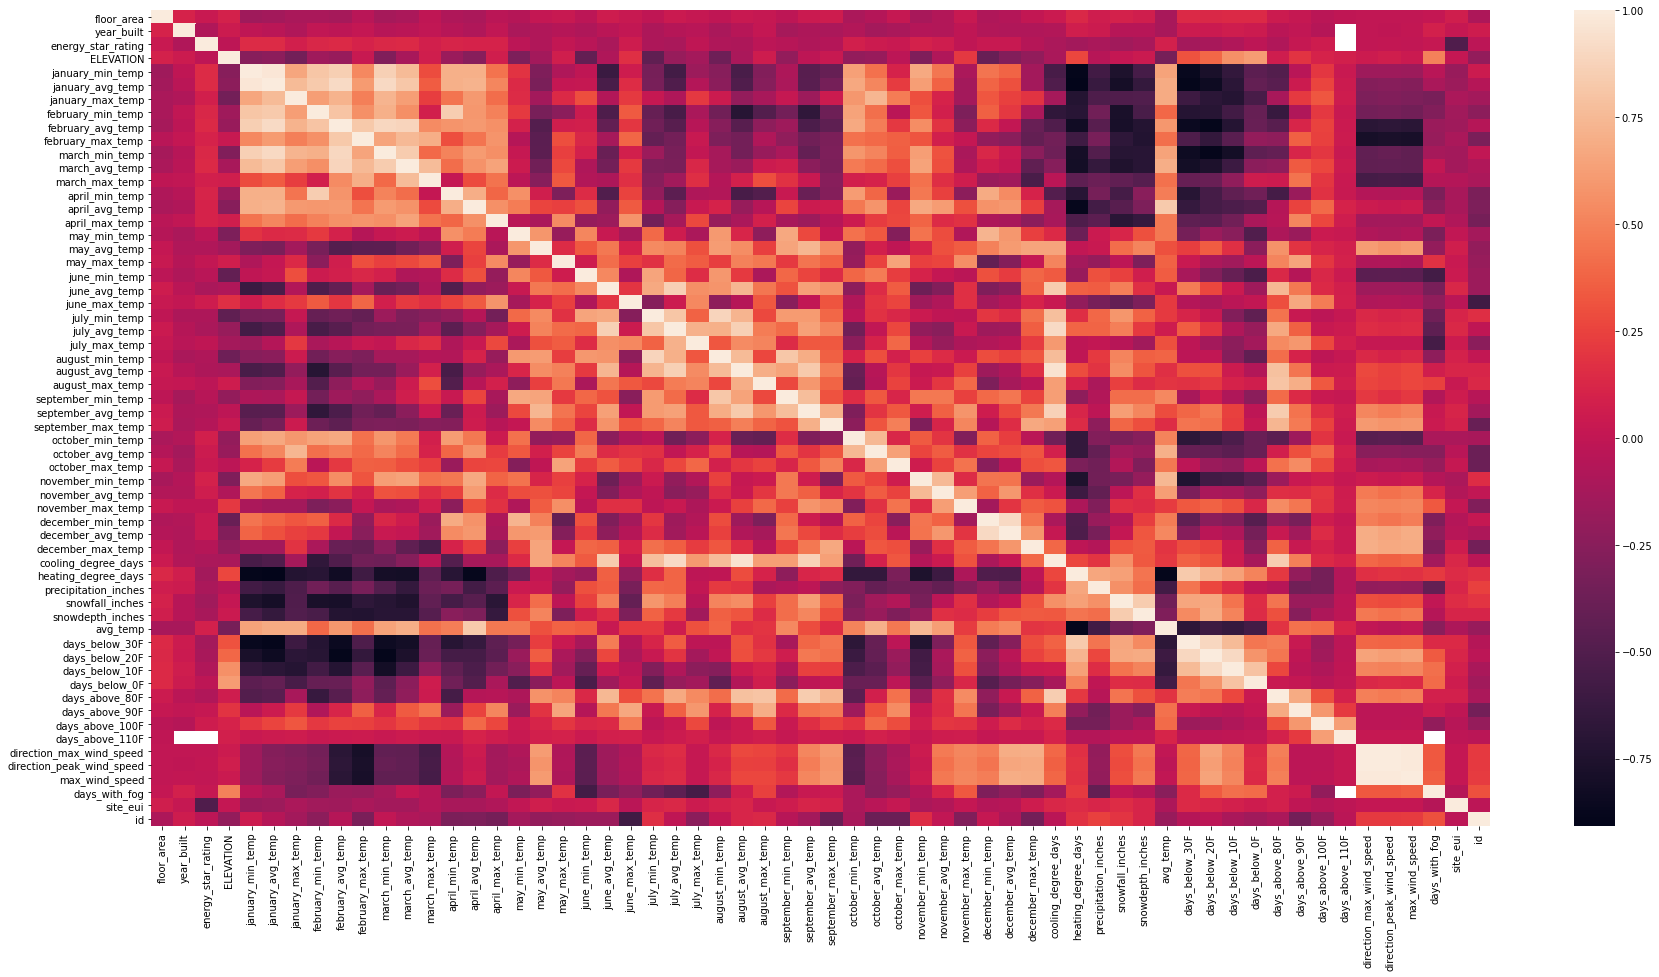

In [38]:
fig = plt.figure(figsize = (30, 15))
sns.heatmap(train_df.corr())

plt.show()

### Correlation Matrix

In [39]:
def find_correlated_features(df, threshold, target_variable):
    neg_threshold=(-1)*threshold
    # remove target column
    df = df.drop(columns=target_variable).copy()
    # Get correlation matrix
    corr_matrix = df.corr()
    # Take half of the matrix to prevent doubling results
    corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
    # Restructure correlation matrix to dataframe
    df = corr_matrix.stack().reset_index()
    df.columns = ['feature1', 'feature2', 'corr_coef']
    # Apply filter and sort coefficients
    print("########## POSITIVE CORRELATION #########")
    print(df[df.corr_coef >= threshold].sort_values('corr_coef', ascending=False))
    print("########## NEGATIVE CORRELATION #########")
    print(df[df.corr_coef <= neg_threshold].sort_values('corr_coef'))


In [40]:
find_correlated_features(train_df,0.8,"year_built")

########## POSITIVE CORRELATION #########
                       feature1                   feature2  corr_coef
1694   direction_max_wind_speed  direction_peak_wind_speed   0.999784
1699  direction_peak_wind_speed             max_wind_speed   0.992227
1695   direction_max_wind_speed             max_wind_speed   0.988797
170            january_min_temp           january_avg_temp   0.971149
1162            august_avg_temp        cooling_degree_days   0.952686
1060              july_avg_temp        cooling_degree_days   0.917971
227            january_avg_temp          february_avg_temp   0.911228
1457          december_min_temp          december_avg_temp   0.910207
229            january_avg_temp             march_min_temp   0.907587
1632             days_below_20F             days_below_10F   0.904578
385           february_avg_temp             march_min_temp   0.900891
1619             days_below_30F             days_below_20F   0.896062
386           february_avg_temp             marc

## Data Distribution Over Years
##### This information is important because we want to know how our data is distributed over the years. We can see that the highest number of buildings are built in 1925-1930. 1962-63 time period is again has a high density. The youngest buildings in the dataset are built in 2015. The dataset could be outdated.

In [41]:
dff=train_df["year_built"].dropna().astype("int")
#yıl değişkenini float yerine int yapamadım

In [42]:
dff=dff[dff>1920]

In [43]:
dff

0        1942
1        1955
2        1951
3        1980
4        1985
         ... 
75750    2013
75751    1928
75752    1995
75755    2012
75756    1974
Name: year_built, Length: 62247, dtype: int32

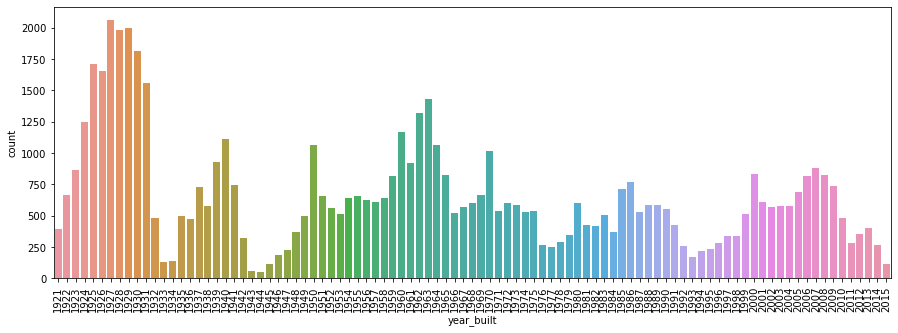

In [44]:
fig = plt.figure(figsize = (15, 5))
sns.countplot(x=dff)
plt.xticks(rotation=90)
plt.show()


## Plot percentage of data belonging to both Train and Test data for state factor feature and explain
##### We can see that most of the data in the train dataset belongs to State 6. But there is no data in the test datasets that belongs to State 6. This means the information about State factor in the train dataset would be misleading. 

<AxesSubplot:ylabel='State_Factor'>

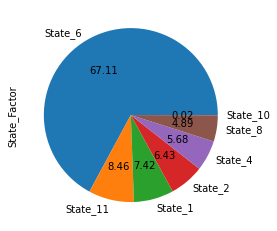

In [45]:
train_df["State_Factor"].value_counts().plot(kind="pie",autopct="%.2f")


<AxesSubplot:ylabel='State_Factor'>

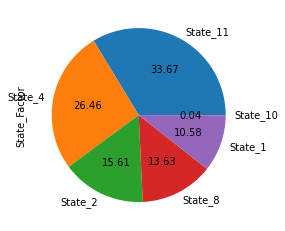

In [46]:
test_df["State_Factor"].value_counts().plot(kind="pie",autopct="%.2f")


## Missing Value Analysis

In [47]:
def df_detailed(df):
    cols=[col for col in df.columns]
    
    missing_values=df[cols].isnull().sum()
    total_entry=df.shape[0]-missing_values
    missing_ratio=missing_values/df.shape[0]*100
    data_type=df.dtypes
    
    nunique=df.nunique()
    df_details=pd.concat([total_entry,missing_values,missing_ratio,data_type,nunique],axis=1,keys=["Total Entry","Number of Missing Values","Missing Value Ratio","Data Type","Unique Value Number"])
    df_details["Unique Values"]=[list(df[col].unique()) for col in df.columns]
    df_details.sort_values(by=['Number of Missing Values'],inplace=True,ascending=False)
    return df_details

In [48]:
df_detailed(train_df)

,Total Entry,Number of Missing Values,Missing Value Ratio,Data Type,Unique Value Number,Unique Values
days_with_fog,29961,45796,60.451179,float64,42,"[nan, 12.0, 89.0, 88.0, 90.0, 104.0, 113.0, 18..."
direction_peak_wind_speed,33946,41811,55.190939,float64,8,"[1.0, nan, 270.0, 320.0, 340.0, 360.0, 330.0, ..."
max_wind_speed,34675,41082,54.228652,float64,16,"[1.0, nan, 12.5, 10.7, 13.4, 21.5, 16.5, 19.7,..."
direction_max_wind_speed,34675,41082,54.228652,float64,10,"[1.0, nan, 270.0, 360.0, 300.0, 320.0, 330.0, ..."
energy_star_rating,49048,26709,35.256148,float64,101,"[11.0, 45.0, 97.0, 46.0, 100.0, nan, 56.0, 99...."
...,...,...,...,...,...,...
july_avg_temp,75757,0,0.000000,float64,161,"[62.72580645, 66.40322581, 68.67741935, 67.580..."
july_max_temp,75757,0,0.000000,int64,41,"[84, 85, 81, 77, 116, 106, 93, 105, 92, 107, 1..."
august_min_temp,75757,0,0.000000,int64,31,"[52, 58, 65, 63, 77, 59, 66, 56, 55, 54, 60, 4..."
august_avg_temp,75757,0,0.000000,float64,167,"[62.16129032, 73.09677419, 73.69354839, 72.903..."


In [49]:
details=df_detailed(train_df)

In [50]:
details.columns

Index(['Total Entry', 'Number of Missing Values', 'Missing Value Ratio',
       'Data Type', 'Unique Value Number', 'Unique Values'],
      dtype='object')

In [51]:
details.loc[details["Data Type"]=="O"]

,Total Entry,Number of Missing Values,Missing Value Ratio,Data Type,Unique Value Number,Unique Values
Year_Factor,75757,0,0.0,object,6,"[1, 2, 3, 4, 5, 6]"
State_Factor,75757,0,0.0,object,7,"[State_1, State_2, State_4, State_6, State_8, ..."
building_class,75757,0,0.0,object,2,"[Commercial, Residential]"
facility_type,75757,0,0.0,object,60,"[Grocery_store_or_food_market, Warehouse_Distr..."


# Outlier Detection Methods
* ## For Numerical Values
* ### Numeric Outlier
** To detect the outliers for a given column, the first and third quartile (Q 1 , Q 3 ) is computed. An observation is flagged an outlier if it lies outside the range R = [Q 1 - k(IQR), Q 3 + k(IQR)] with IQR = Q 3 - Q 1 and k >= 0. Setting k = 1.5 the smallest value in R corresponds, typically, to the lower end of a boxplot's whisker and largest value to its upper end.
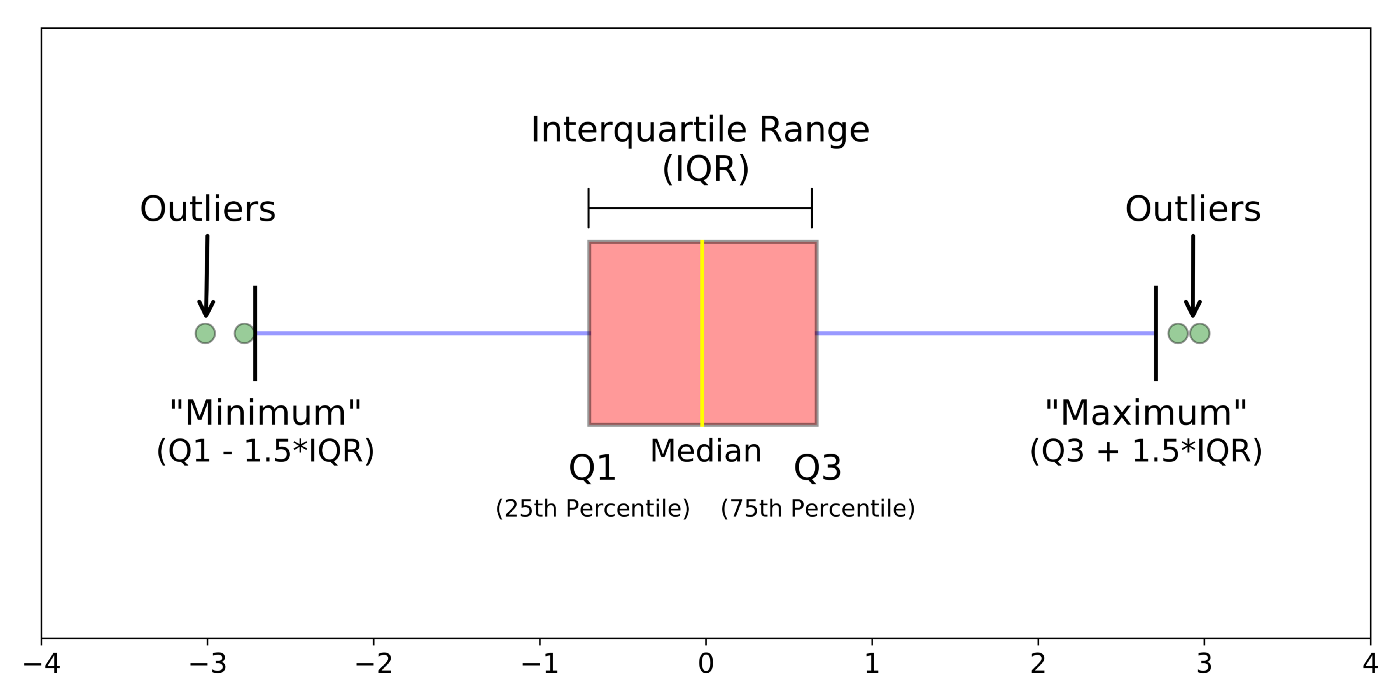
* ### Local Outlier Factor
** (LOF) algorithm computes a score (called local outlier factor) reflecting the degree of abnormality of the observations. It measures the local density deviation of a given data point with respect to its neighbors. The idea is to detect the samples that have a substantially lower density than their neighbors.
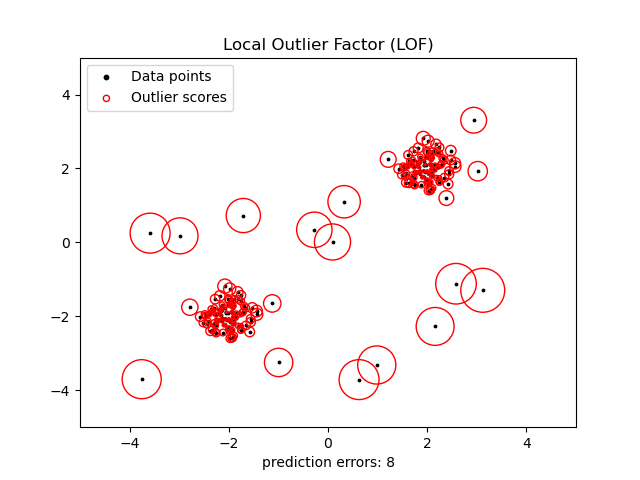
* ### Isolation Forest
** the ensemble.IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.
Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.

* ## For Categorical Values
** Detecting outliers in the categorical data is something about the comparison between the percentage of availability of data for all the categories. We can find this comparison using the bar chart or histogram. 

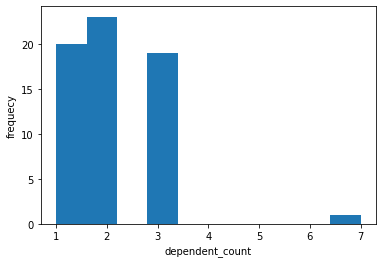


# Missing Value Handling

## Numerical Values

### Replacing With Mean

* This is the most common method of imputing missing values of numeric columns. If there are outliers then the mean will not be appropriate. In such cases, outliers need to be treated first.

### Prediction of missing values:
* In the earlier methods to handle missing values, we do not use the correlation advantage of the variable containing the missing value and other variables. Using the other features which don’t have nulls can be used to predict missing values. The regression or classification model can be used for the prediction of missing values depending on the nature (categorical or continuous) of the feature having missing value.

### Nearest Neighbors Imputations (KNNImputer)
* Missing values are imputed using the k-Nearest Neighbors approach where a Euclidean distance is used to find the nearest neighbors.

## Categorical Values
### Imputation method for categorical columns:
* When missing values is from categorical columns (string or numerical) then the missing values can be replaced with the most frequent category. If the number of missing values is very large then it can be replaced with a new category.

### Prediction Methods

### Datatype Analysis

In [52]:
train_df.select_dtypes("int64").columns

Index(['january_min_temp', 'january_max_temp', 'february_min_temp',
       'february_max_temp', 'march_min_temp', 'march_max_temp',
       'april_min_temp', 'april_max_temp', 'may_min_temp', 'may_max_temp',
       'june_min_temp', 'june_max_temp', 'july_min_temp', 'july_max_temp',
       'august_min_temp', 'august_max_temp', 'september_min_temp',
       'september_max_temp', 'october_min_temp', 'october_max_temp',
       'november_min_temp', 'november_max_temp', 'december_min_temp',
       'december_max_temp', 'cooling_degree_days', 'heating_degree_days',
       'snowdepth_inches', 'days_below_30F', 'days_below_20F',
       'days_below_10F', 'days_below_0F', 'days_above_80F', 'days_above_90F',
       'days_above_100F', 'days_above_110F', 'id'],
      dtype='object')

In [53]:
train_df.select_dtypes("float").columns


Index(['floor_area', 'year_built', 'energy_star_rating', 'ELEVATION',
       'january_avg_temp', 'february_avg_temp', 'march_avg_temp',
       'april_avg_temp', 'may_avg_temp', 'june_avg_temp', 'july_avg_temp',
       'august_avg_temp', 'september_avg_temp', 'october_avg_temp',
       'november_avg_temp', 'december_avg_temp', 'precipitation_inches',
       'snowfall_inches', 'avg_temp', 'direction_max_wind_speed',
       'direction_peak_wind_speed', 'max_wind_speed', 'days_with_fog',
       'site_eui'],
      dtype='object')

*temp, year, energy star rating,elevation,precipitation_inches,snowfall_inches,"direction_max_wind_speed",floor area ,site eui continuous.*

*Days below, above cooling_degree_days', 'heating_degree_days', ,days with fog discrete*
###### direction?

In [54]:
train_df.select_dtypes("O").columns

Index(['Year_Factor', 'State_Factor', 'building_class', 'facility_type'], dtype='object')

All categorical columns are nominal

## Normally Distributed Columns
#### We can see if a numerical column is normally distributed with the help of a histogram. 
#### Only site EUI seems like it has a normal distribution.

In [55]:
def plot_hist(df,col):
    sns.distplot(df[col], bins=50, color='crimson')
        

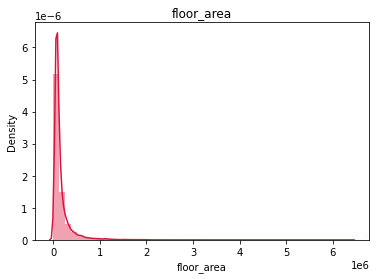

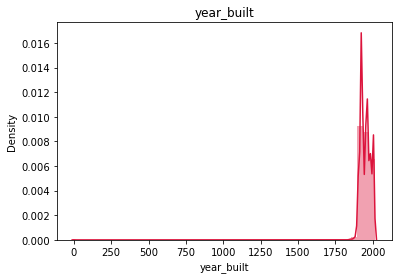

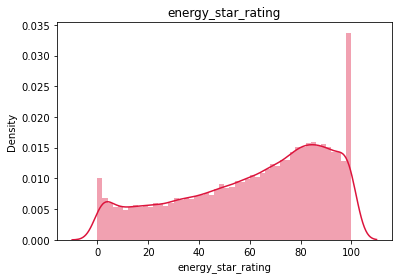

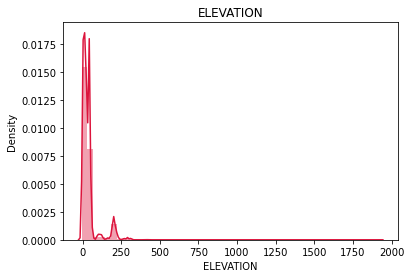

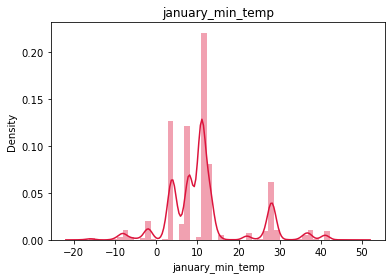

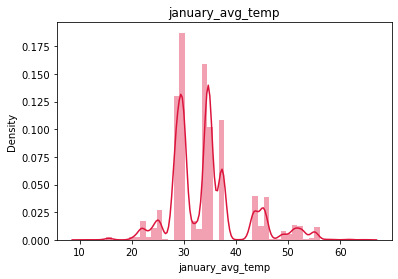

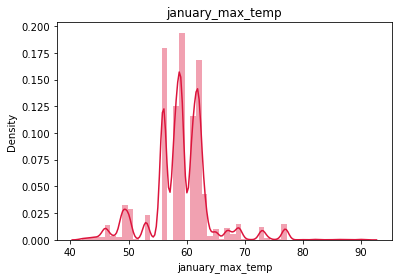

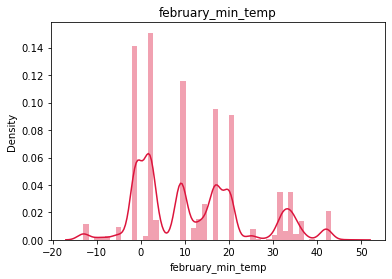

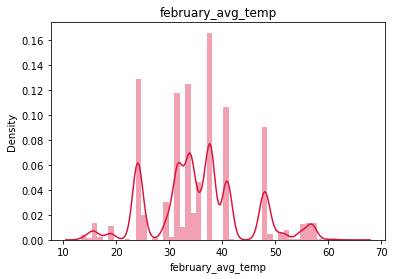

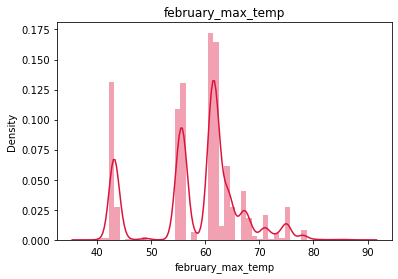

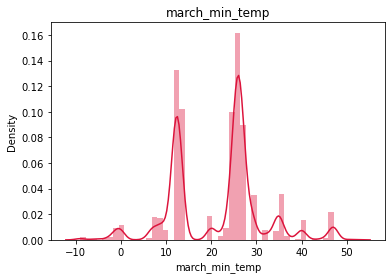

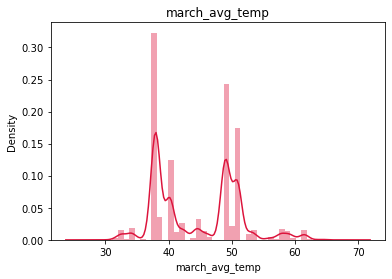

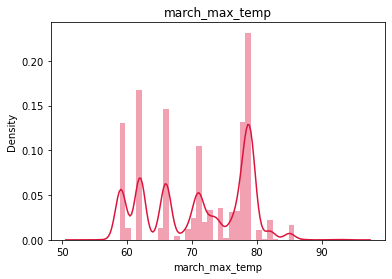

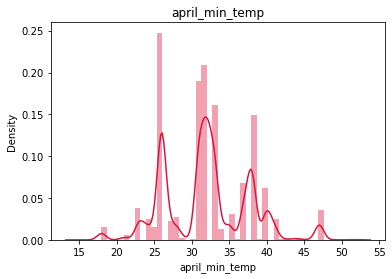

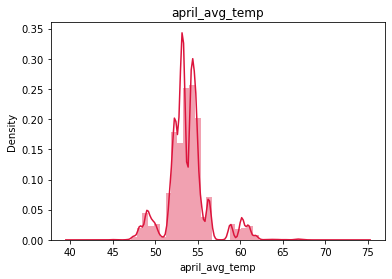

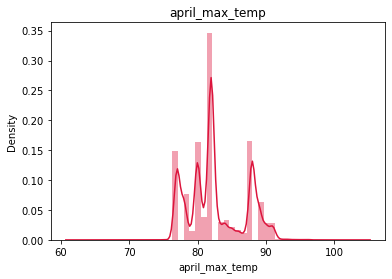

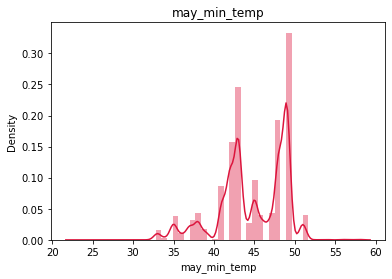

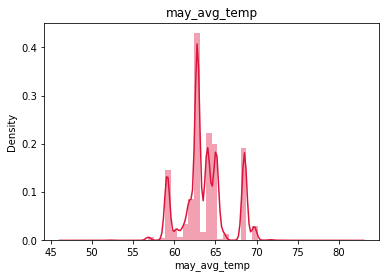

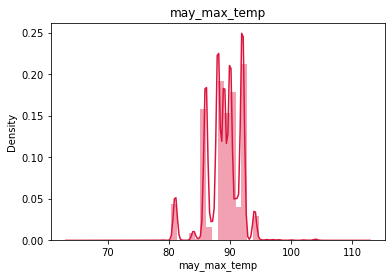

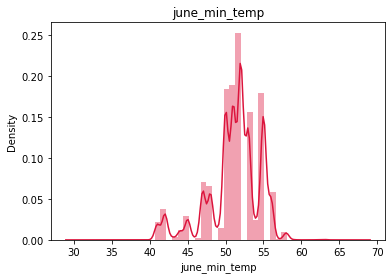

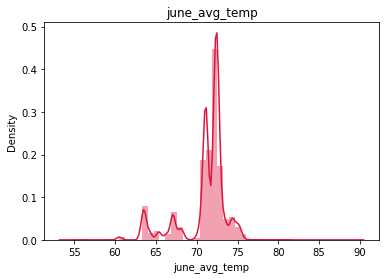

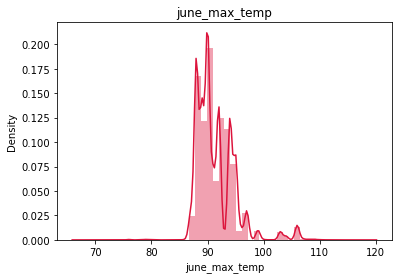

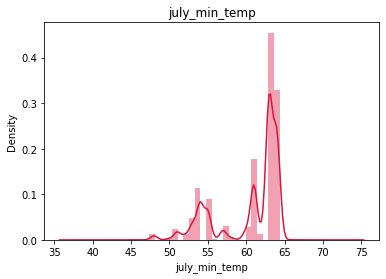

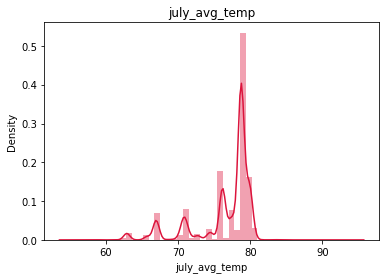

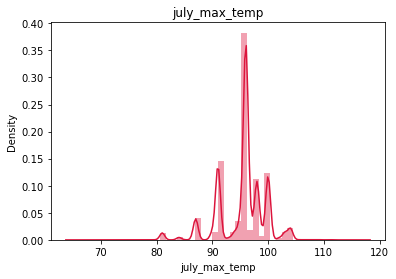

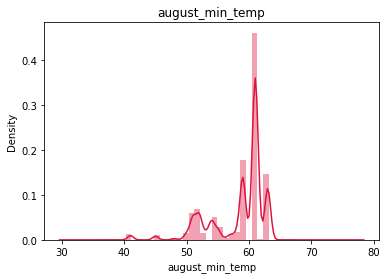

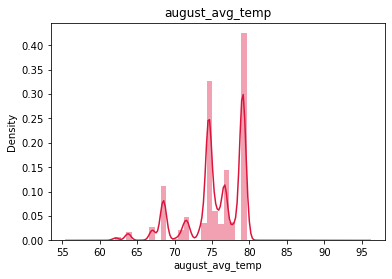

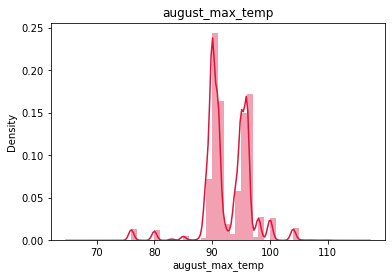

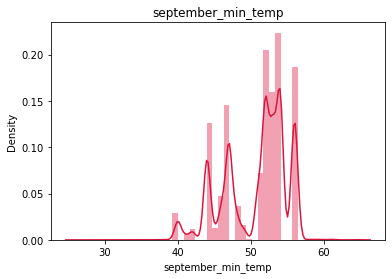

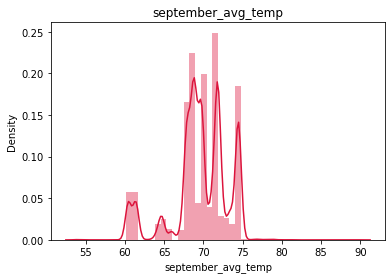

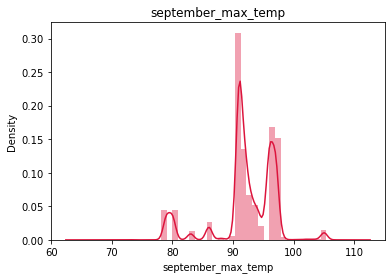

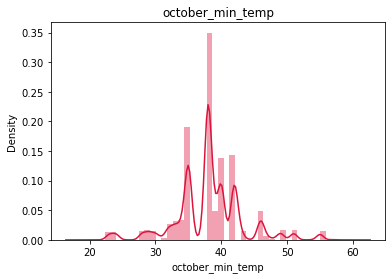

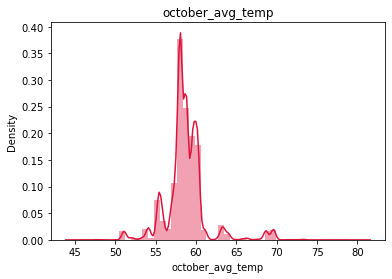

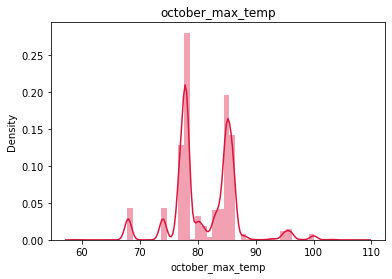

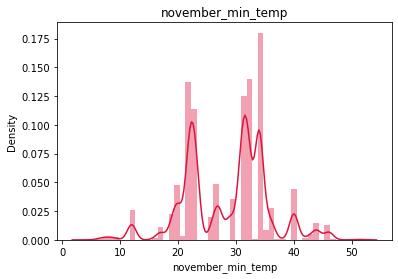

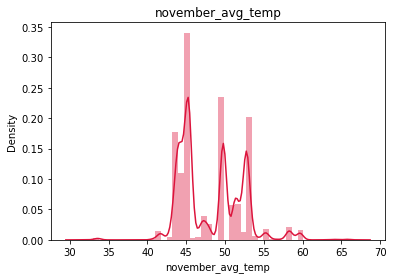

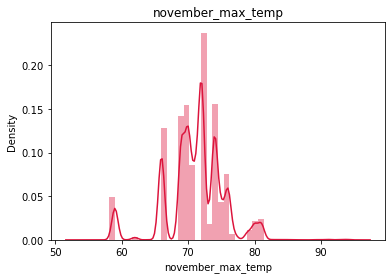

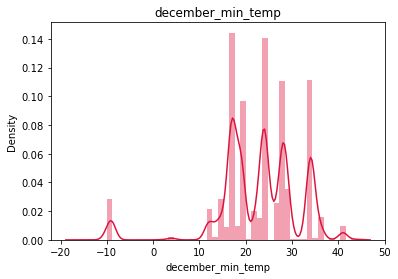

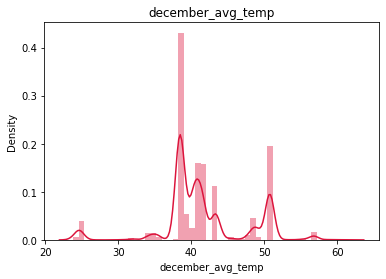

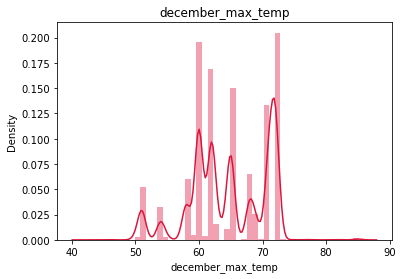

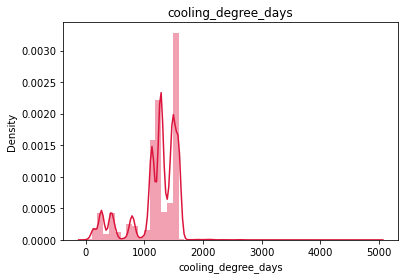

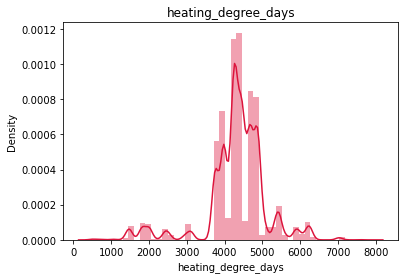

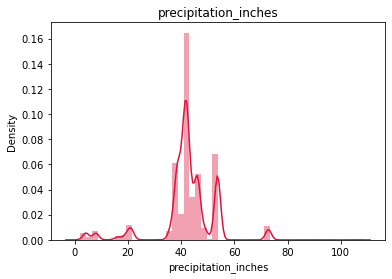

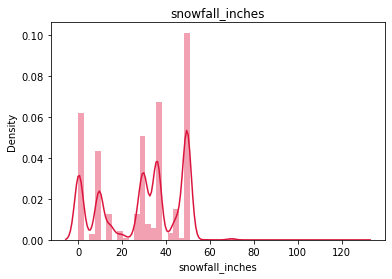

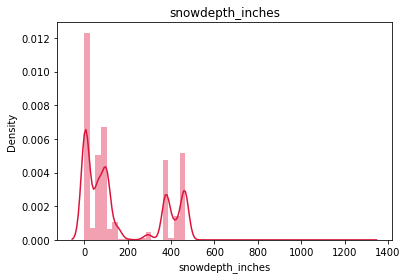

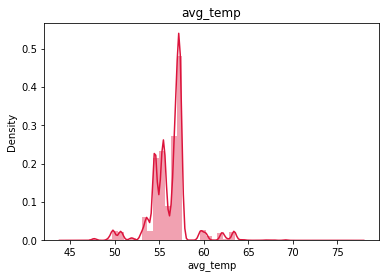

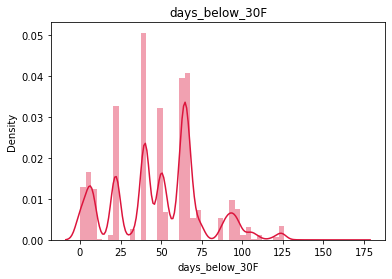

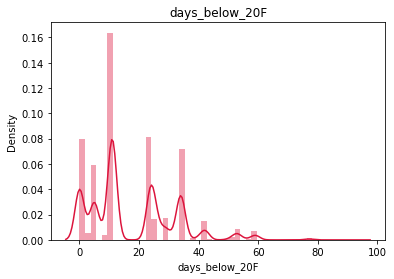

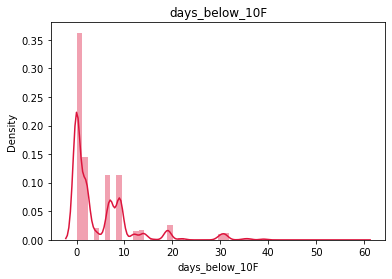

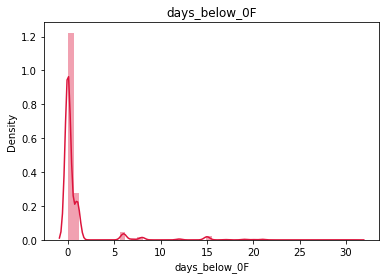

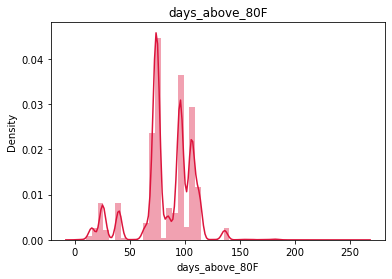

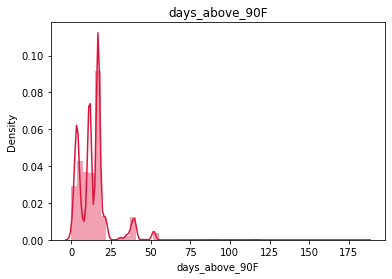

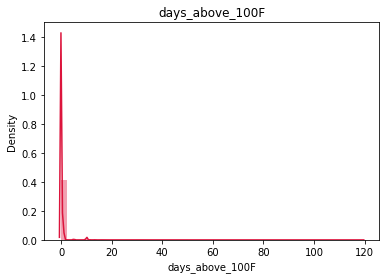

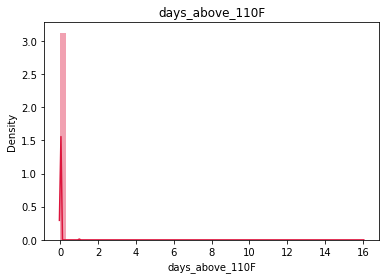

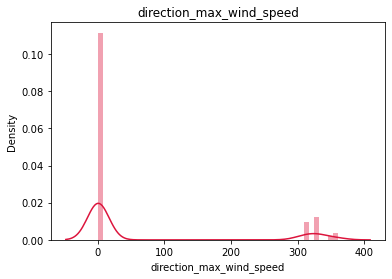

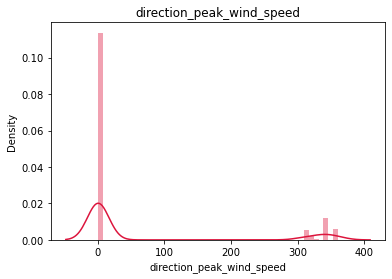

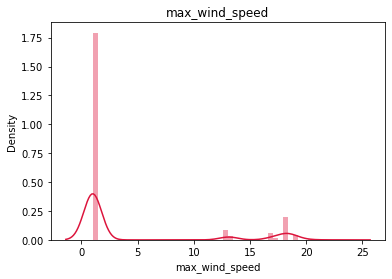

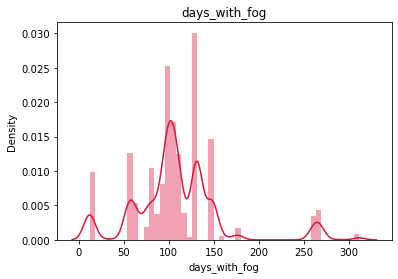

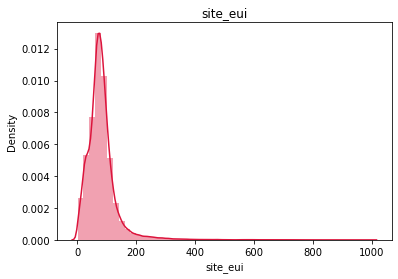

In [56]:
for col in num_cols:
    g=plot_hist(train_df,col)
    plt.title(f"{col}")
    plt.show(g)

In [57]:
train_df["site_eui"].describe()

count    75757.000000
mean        82.584693
std         58.255403
min          1.001169
25%         54.528601
50%         75.293716
75%         97.277534
max        997.866120
Name: site_eui, dtype: float64

In [58]:
normal_cols=["site_eui"]

In [59]:
not_normal_cols=[col for col in num_cols if col not in normal_cols]

In [60]:
not_normal_cols

['floor_area',
 'year_built',
 'energy_star_rating',
 'ELEVATION',
 'january_min_temp',
 'january_avg_temp',
 'january_max_temp',
 'february_min_temp',
 'february_avg_temp',
 'february_max_temp',
 'march_min_temp',
 'march_avg_temp',
 'march_max_temp',
 'april_min_temp',
 'april_avg_temp',
 'april_max_temp',
 'may_min_temp',
 'may_avg_temp',
 'may_max_temp',
 'june_min_temp',
 'june_avg_temp',
 'june_max_temp',
 'july_min_temp',
 'july_avg_temp',
 'july_max_temp',
 'august_min_temp',
 'august_avg_temp',
 'august_max_temp',
 'september_min_temp',
 'september_avg_temp',
 'september_max_temp',
 'october_min_temp',
 'october_avg_temp',
 'october_max_temp',
 'november_min_temp',
 'november_avg_temp',
 'november_max_temp',
 'december_min_temp',
 'december_avg_temp',
 'december_max_temp',
 'cooling_degree_days',
 'heating_degree_days',
 'precipitation_inches',
 'snowfall_inches',
 'snowdepth_inches',
 'avg_temp',
 'days_below_30F',
 'days_below_20F',
 'days_below_10F',
 'days_below_0F',
 'day

In [61]:
train_df[num_list].describe([0.01,0.25,0.50,0.75,0.99]).T


,count,mean,std,min,1%,25%,50%,75%,99%,max
floor_area,75757.0,165983.865858,246875.790940,943.000000,13740.000000,62379.000000,91367.000000,166000.000000,1.217613e+06,6.385382e+06
year_built,73920.0,1952.306764,37.053619,0.000000,1895.000000,1927.000000,1951.000000,1977.000000,2.013000e+03,2.015000e+03
energy_star_rating,49048.0,61.048605,28.663683,0.000000,1.000000,40.000000,67.000000,85.000000,1.000000e+02,1.000000e+02
ELEVATION,75757.0,39.506323,60.656596,-6.400000,2.400000,11.900000,25.000000,42.700000,2.326000e+02,1.924500e+03
january_min_temp,75757.0,11.432343,9.381027,-19.000000,-8.000000,6.000000,11.000000,13.000000,4.100000e+01,4.900000e+01
january_avg_temp,75757.0,34.310468,6.996108,10.806452,21.935484,29.827586,34.451613,37.322581,5.509677e+01,6.475806e+01
january_max_temp,75757.0,59.054952,5.355458,42.000000,46.000000,56.000000,59.000000,62.000000,7.700000e+01,9.100000e+01
february_min_temp,75757.0,11.720567,12.577272,-13.000000,-13.000000,2.000000,9.000000,20.000000,4.200000e+01,4.800000e+01
february_avg_temp,75757.0,35.526837,8.866697,13.250000,15.696429,31.625000,34.107143,40.879310,5.694828e+01,6.510714e+01
february_max_temp,75757.0,58.486278,8.414611,38.000000,43.000000,55.000000,61.000000,62.000000,7.800000e+01,8.900000e+01


## Outlier Detection for Normally distributed columns
### Standard Deviation Outlier Detection Method
##### In standard deviation method we first calculate the mean of all the values. Than we determine upper and lower thresholds according to the standard deviation of the values. By adding or subtracting 2 or 3 times the standard deviation, we get the limits.


In [62]:
#for loop mu pd.df.loc[] mu mantıklı hız açısından?
def stdev_outliers(df,col):
    data_mean, data_std = df[col].mean(), df[col].std()
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    outliers = [x for x in df[col] if x < lower or x > upper]
    return outliers

### Z score Method
##### Z score is a statistical score which is obtained by subtracting the mean and dividing by the standard deviation. I decided the threshold as 3 in this case. If the Z score is bigger than the threshold, the value is an outlier.

In [63]:
def z_score_outliers(df,col):
    data_mean, data_std = df[col].mean(), df[col].std()
    threshold = 3
    outlier = []
    for i in df[col]:
        z = (i-data_mean)/data_std
        if z > threshold:
            outlier.append(i)
    return outlier

### Examining Site EUI by using boxplot
##### Although the graph shows values above 200 as outliers, we can see that around above 800, the values have increased. So I am thinking of labeling the values above 800 as outliers.

<AxesSubplot:xlabel='site_eui'>

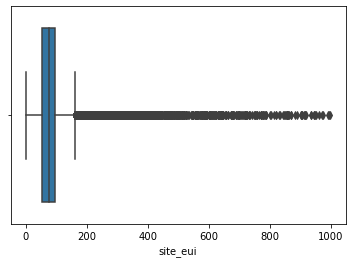

In [64]:
sns.boxplot(train_df["site_eui"])

#### We can see that the graph shows values above 200 as outliers. If we find the values that are above 200, there are more than 2000 values. This would be a huge loss if we considered these data as outliers. 

In [65]:
len(train_df[train_df["site_eui"]>200])

2259

### Applying Standard Deviation and Z score methods to find the outliers
##### Both of the methods give the same result, so I will use standard deviation method.


In [66]:
stdev_outliers(train_df,"site_eui")==z_score_outliers(train_df,"site_eui")

True

### Graphing the distribution of the outliers found in Standard Deviation Method
##### We can see that there are very few values after 800. We can determine the threshold as 800 and label the values above 800 as outliers.

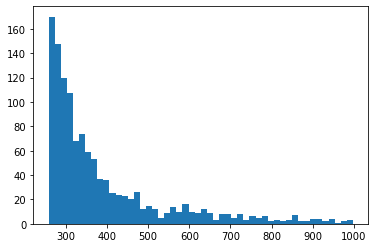

In [67]:
g=plt.hist(stdev_outliers(train_df,"site_eui"),bins=50)

In [68]:
dff=train_df.copy()
dff.loc[(dff["site_eui"] > 800), "site_eui"] = 800



In [69]:
def show_changes(df1,df2,col):
    ########distplot########
    plt.subplot(1, 2, 1)
    g=sns.distplot(df1[col],bins=100)
    plt.subplot(1, 2, 2)
    h=sns.distplot(df2[col],bins=100)
    plt.title("Distplot of the dataframe before and after suppressing the outliers")
    plt.show(g)
    plt.show(h)
    ########boxplot#########
    plt.subplot(1, 2, 1)
    i=sns.boxplot(df1[col])
    plt.subplot(1, 2, 2)
    j=sns.boxplot(df2[col])
    plt.title("Boxplot of the dataframe before and after suppressing the outliers")
    plt.show(i)
    plt.show(j)
    ########describe#########
    print("Description of the dataframe before suppressing outliers.")
    print(df1[col].describe([0.01,0.25,0.50,0.75,0.99]))
    print("Description of the dataframe after suppressing outliers.")
    print(df2[col].describe([0.01,0.25,0.50,0.75,0.99]))
    

### Before and After Suppressing the Outliers
##### In the distplots above, we can see that changing the values above 800 to 800 has made the data more normally distributed. And the maximum value is 800 instead of 1000. But still, the mean and the standard deviation of the data hasn't changed much. If we determined the threshold around 400, we could see a bigger impact.

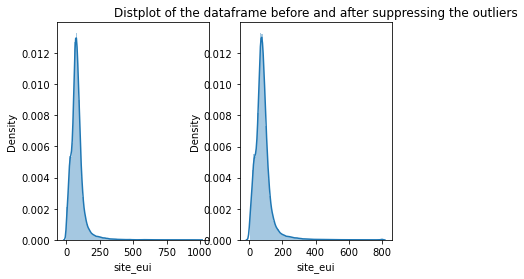

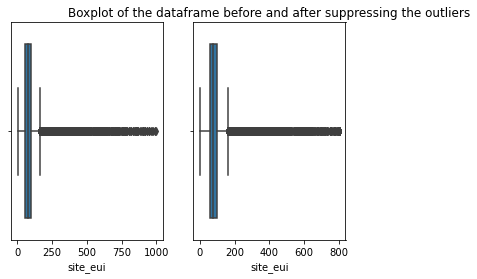

Description of the dataframe before suppressing outliers.
count    75757.000000
mean        82.584693
std         58.255403
min          1.001169
1%           6.234733
25%         54.528601
50%         75.293716
75%         97.277534
99%        304.441285
max        997.866120
Name: site_eui, dtype: float64
Description of the dataframe after suppressing outliers.
count    75757.000000
mean        82.534723
std         57.582465
min          1.001169
1%           6.234733
25%         54.528601
50%         75.293716
75%         97.277534
99%        304.441285
max        800.000000
Name: site_eui, dtype: float64


In [70]:
show_changes(train_df,dff,"site_eui")

## Outlier detection for columns that are not normally distributed
### IQR method Implementation


In [71]:
def outlier_thresholds(df, col, q1=0.25, q3=0.75):
    quartile1 = df[col].quantile(q1)
    quartile3 = df[col].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [72]:
def iqr_outliers(df, col):
    low_limit, up_limit = outlier_thresholds(df, col,q1=0.1,q3=0.9)
    
    outliers=df.loc[(df[col]<low_limit) | (df[col]>up_limit)]
    
    return outliers
        
       

### Percentage Method Implementation

In [73]:
def percentage_outliers(df,col,up=0.99,low=0.01):
    
    outliers=list(df[col][df[col] >df[col].quantile(up)])
    outliers.extend(list(df[col][df[col] <df[col].quantile(low)]))
    low=df[col].quantile(low)
    up=df[col].quantile(up)
    return low,up,outliers

### Comparing IQR Method and Percentage Method
##### The number of outliers detected by these two methods seems different. I plotted the number of outliers for each method. It seems IQR method finds a lot more outliers for some of the columns. Percentage method finds outliers for every column, but IQR finds very few outliers mostly. Percentage method always finds outliers because there are always values in the 0.99 percentile, while in IQR method there are times where the upper or lower limit exceeds the limits of the data.

In [74]:
df=pd.DataFrame(index=not_normal_cols,columns=["number_of_outliers_percentage","number_of_outliers_iqr"])


In [75]:
for col in not_normal_cols :
    low,up,outliers=percentage_outliers(train_df,col)
    
    df["number_of_outliers_percentage"]=len(outliers)

In [76]:

df["number_of_outliers_iqr"]=[len(iqr_outliers(train_df,col)) for col in not_normal_cols ]

In [77]:
df["col"]=df.index

In [78]:
df

,number_of_outliers_percentage,number_of_outliers_iqr,col
floor_area,170,1988,floor_area
year_built,170,21,year_built
energy_star_rating,170,0,energy_star_rating
ELEVATION,170,5367,ELEVATION
january_min_temp,170,0,january_min_temp
january_avg_temp,170,0,january_avg_temp
january_max_temp,170,216,january_max_temp
february_min_temp,170,0,february_min_temp
february_avg_temp,170,0,february_avg_temp
february_max_temp,170,0,february_max_temp


Text(0.5, 1.0, 'Number of Outliers in Each Column with Percentage method')

<Figure size 720x3600 with 0 Axes>

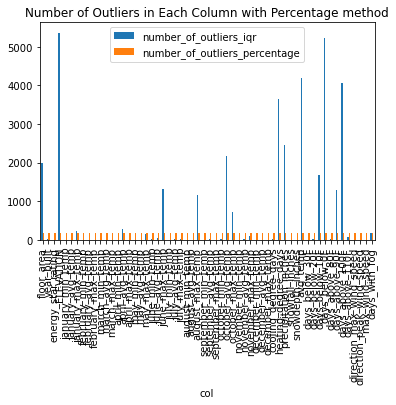

In [79]:
plt.figure(figsize=(10,50))


df.plot(kind="bar",x="col",y=["number_of_outliers_iqr","number_of_outliers_percentage"])
plt.title("Number of Outliers in Each Column with Percentage method")



In [80]:
not_normal_cols

['floor_area',
 'year_built',
 'energy_star_rating',
 'ELEVATION',
 'january_min_temp',
 'january_avg_temp',
 'january_max_temp',
 'february_min_temp',
 'february_avg_temp',
 'february_max_temp',
 'march_min_temp',
 'march_avg_temp',
 'march_max_temp',
 'april_min_temp',
 'april_avg_temp',
 'april_max_temp',
 'may_min_temp',
 'may_avg_temp',
 'may_max_temp',
 'june_min_temp',
 'june_avg_temp',
 'june_max_temp',
 'july_min_temp',
 'july_avg_temp',
 'july_max_temp',
 'august_min_temp',
 'august_avg_temp',
 'august_max_temp',
 'september_min_temp',
 'september_avg_temp',
 'september_max_temp',
 'october_min_temp',
 'october_avg_temp',
 'october_max_temp',
 'november_min_temp',
 'november_avg_temp',
 'november_max_temp',
 'december_min_temp',
 'december_avg_temp',
 'december_max_temp',
 'cooling_degree_days',
 'heating_degree_days',
 'precipitation_inches',
 'snowfall_inches',
 'snowdepth_inches',
 'avg_temp',
 'days_below_30F',
 'days_below_20F',
 'days_below_10F',
 'days_below_0F',
 'day

### Floor Area Outlier Detection
#### IQR Method
It seems like over 3000000, the outliers are more rare. We can label the values above 3000000 as outliers.

<AxesSubplot:xlabel='floor_area'>

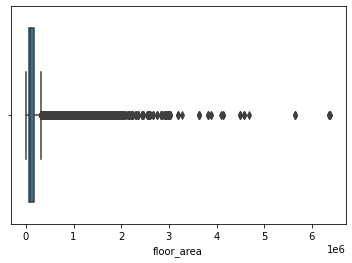

In [81]:
sns.boxplot(train_df["floor_area"])

In [82]:
len(train_df[train_df["floor_area"]>3000000])

40

In [83]:
dff.loc[(dff["floor_area"] > 3000000), "floor_area"] = 3000000

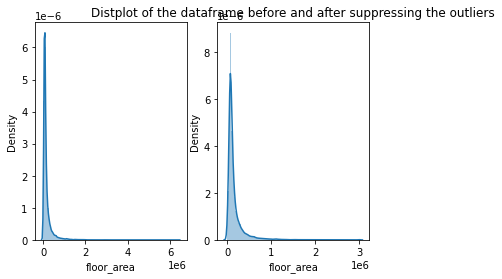

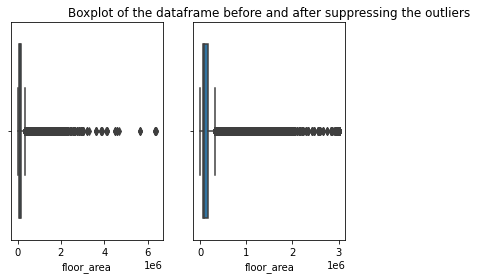

Description of the dataframe before suppressing outliers.
count    7.575700e+04
mean     1.659839e+05
std      2.468758e+05
min      9.430000e+02
1%       1.374000e+04
25%      6.237900e+04
50%      9.136700e+04
75%      1.660000e+05
99%      1.217613e+06
max      6.385382e+06
Name: floor_area, dtype: float64
Description of the dataframe after suppressing outliers.
count    7.575700e+04
mean     1.653425e+05
std      2.364807e+05
min      9.430000e+02
1%       1.374000e+04
25%      6.237900e+04
50%      9.136700e+04
75%      1.660000e+05
99%      1.217613e+06
max      3.000000e+06
Name: floor_area, dtype: float64


In [84]:
show_changes(train_df,dff,"floor_area")

#### Percentage Method
I tried to understand the distribution of the values that were labeled as outliers in my percentage method function. For the lower threshold, the values are more rare below 8000, for the higher threshold, the values are more rare after around 3200000. After suppressing the outliers to the thresholds, the data seems more normally distributed. 

In [85]:
low,up,outliers=percentage_outliers(train_df,"floor_area")

In [86]:
low

13740.0

(array([  5.,  19.,  13.,  20.,  14.,  12.,  25., 228., 203., 218.]),
 array([  943. ,  2220.9,  3498.8,  4776.7,  6054.6,  7332.5,  8610.4,
         9888.3, 11166.2, 12444.1, 13722. ]),
 <BarContainer object of 10 artists>)

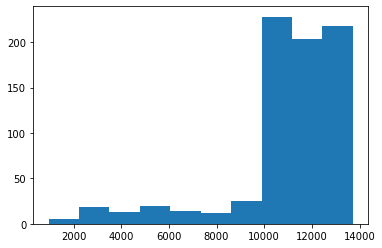

In [87]:
plt.hist(train_df["floor_area"][train_df["floor_area"]<low])

In [88]:
len(train_df[train_df["floor_area"]<8000])

77

In [89]:
up

1217613.2000000002

(array([433., 205.,  48.,  43.,   5.,   9.,   7.,   0.,   3.,   5.]),
 array([1217630. , 1734405.2, 2251180.4, 2767955.6, 3284730.8, 3801506. ,
        4318281.2, 4835056.4, 5351831.6, 5868606.8, 6385382. ]),
 <BarContainer object of 10 artists>)

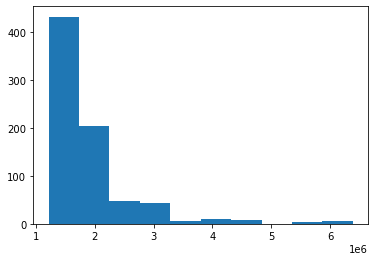

In [90]:
plt.hist(train_df["floor_area"][train_df["floor_area"]>up])

In [91]:
len(train_df[train_df["floor_area"]>3200000])

30

In [92]:
df_copy=train_df.copy()
df_copy.loc[(df_copy["floor_area"] > 3200000), "floor_area"] = 3200000
df_copy.loc[(df_copy["floor_area"] < 8000), "floor_area"] = 8000

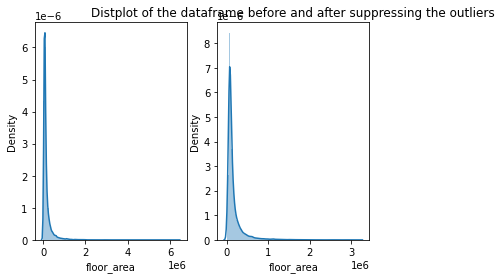

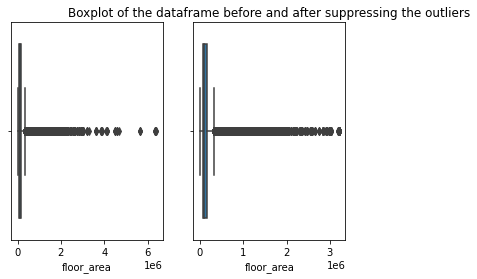

Description of the dataframe before suppressing outliers.
count    7.575700e+04
mean     1.659839e+05
std      2.468758e+05
min      9.430000e+02
1%       1.374000e+04
25%      6.237900e+04
50%      9.136700e+04
75%      1.660000e+05
99%      1.217613e+06
max      6.385382e+06
Name: floor_area, dtype: float64
Description of the dataframe after suppressing outliers.
count    7.575700e+04
mean     1.654355e+05
std      2.375872e+05
min      8.000000e+03
1%       1.374000e+04
25%      6.237900e+04
50%      9.136700e+04
75%      1.660000e+05
99%      1.217613e+06
max      3.200000e+06
Name: floor_area, dtype: float64


In [93]:
show_changes(train_df,df_copy,"floor_area")

### Year Built Outlier Detection
#### IQR Method
I chose to label the values that are below 1750 as outliers. I deleted the outliers because some of them were 0 and I didn't think it would be accurate to give them the value of the lower threshold. After deleting the outliers, the data seems more clearly in the graphs because zeros were affecting the graphs. And the standard deviation has decreased.

<AxesSubplot:xlabel='year_built'>

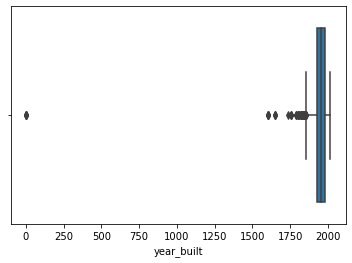

In [94]:
sns.boxplot(train_df["year_built"])

In [95]:
outlier_indices=train_df[train_df["year_built"]<1750]["year_built"].index

In [96]:
dff.drop(outlier_indices,inplace=True)

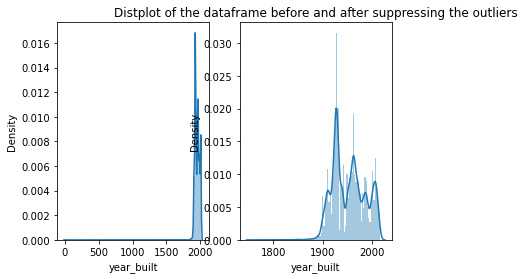

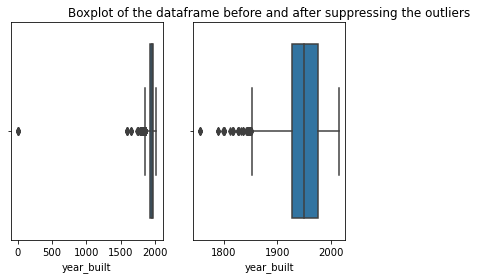

Description of the dataframe before suppressing outliers.
count    73920.000000
mean      1952.306764
std         37.053619
min          0.000000
1%        1895.000000
25%       1927.000000
50%       1951.000000
75%       1977.000000
99%       2013.000000
max       2015.000000
Name: year_built, dtype: float64
Description of the dataframe after suppressing outliers.
count    73903.000000
mean      1952.513267
std         32.374067
min       1756.000000
1%        1895.000000
25%       1927.000000
50%       1951.000000
75%       1977.000000
99%       2013.000000
max       2015.000000
Name: year_built, dtype: float64


In [97]:
show_changes(train_df,dff,"year_built")

#### Percentage Method

In [98]:
low,up,outliers=percentage_outliers(train_df,"year_built")

In [99]:
low

1895.0

In [100]:
len(train_df[train_df["year_built"]<1850])

71

In [101]:
df_copy=train_df.copy()

In [102]:
outlier_indices=train_df[train_df["year_built"]==0]["year_built"].index

In [103]:
df_copy.drop(outlier_indices,inplace=True)

In [104]:
len(df_copy[df_copy["year_built"]<1850])

65

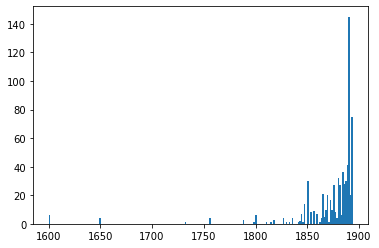

In [105]:
g=plt.hist(df_copy["year_built"][train_df["year_built"]<low],bins=199)
plt.show(g)

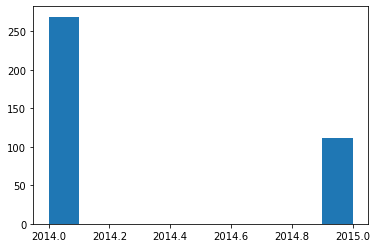

In [106]:
g=plt.hist(df_copy["year_built"][train_df["year_built"]>up])
plt.show(g)

In [107]:
df_copy.loc[(df_copy["year_built"] < 1850), "year_built"] = 1850

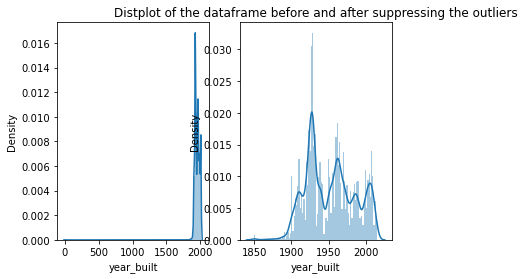

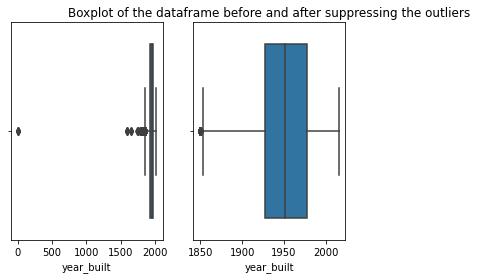

Description of the dataframe before suppressing outliers.
count    73920.000000
mean      1952.306764
std         37.053619
min          0.000000
1%        1895.000000
25%       1927.000000
50%       1951.000000
75%       1977.000000
99%       2013.000000
max       2015.000000
Name: year_built, dtype: float64
Description of the dataframe after suppressing outliers.
count    73914.000000
mean      1952.516370
std         32.322174
min       1850.000000
1%        1895.000000
25%       1927.000000
50%       1951.000000
75%       1977.000000
99%       2013.000000
max       2015.000000
Name: year_built, dtype: float64


In [108]:
show_changes(train_df,df_copy,"year_built")

### Elevation Ouutlier Detection
#### IQR Method


<AxesSubplot:xlabel='ELEVATION'>

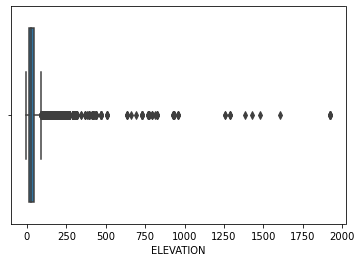

In [109]:
sns.boxplot(train_df["ELEVATION"])

In [110]:
len(train_df[train_df["ELEVATION"]>1000])

16

In [111]:
dff.loc[(dff["ELEVATION"] > 1000), "ELEVATION"] = 1000

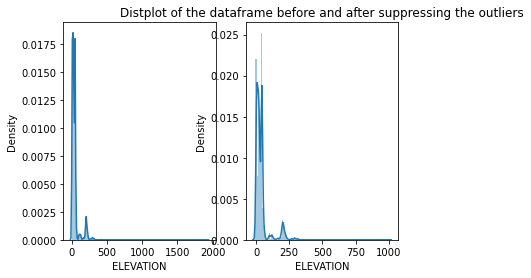

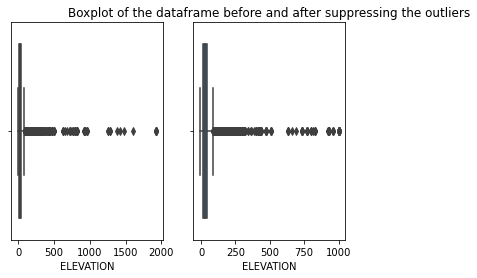

Description of the dataframe before suppressing outliers.
count    75757.000000
mean        39.506323
std         60.656596
min         -6.400000
1%           2.400000
25%         11.900000
50%         25.000000
75%         42.700000
99%        232.600000
max       1924.500000
Name: ELEVATION, dtype: float64
Description of the dataframe after suppressing outliers.
count    75740.000000
mean        39.381101
std         57.765090
min         -6.400000
1%           2.400000
25%         11.900000
50%         25.000000
75%         42.700000
99%        232.600000
max       1000.000000
Name: ELEVATION, dtype: float64


In [112]:
show_changes(train_df,dff,"ELEVATION")

#### Percentage Method
It seems like there are only two values below 0. So I will label them as outliers.

In [128]:
low,up,outlier=percentage_outliers(train_df,"ELEVATION")

In [129]:
low

2.4

In [134]:
len(train_df[train_df["ELEVATION"]<low])

65

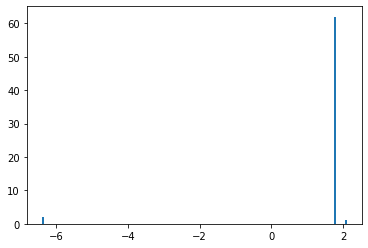

In [135]:
g=plt.hist(df_copy["ELEVATION"][train_df["ELEVATION"]<low],bins=199)
plt.show(g)

In [136]:
len(train_df[train_df["ELEVATION"]<0])

2

In [137]:
up

232.6

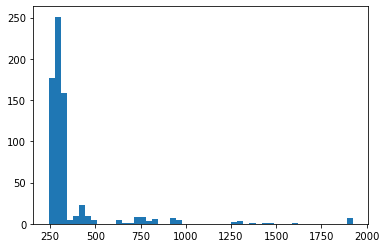

In [138]:
g=plt.hist(df_copy["ELEVATION"][train_df["ELEVATION"]>up],bins=50)
plt.show(g)

In [140]:
len(train_df[train_df["ELEVATION"]>1000])

16

In [141]:
df_copy.loc[(df_copy["ELEVATION"] > 1000), "ELEVATION"] = 1000
df_copy.loc[(df_copy["ELEVATION"] < 0), "ELEVATION"] = 0


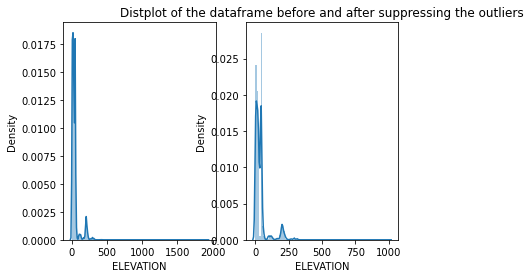

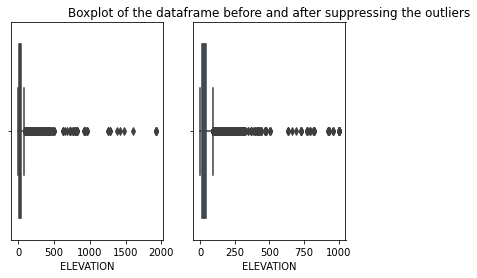

Description of the dataframe before suppressing outliers.
count    75757.000000
mean        39.506323
std         60.656596
min         -6.400000
1%           2.400000
25%         11.900000
50%         25.000000
75%         42.700000
99%        232.600000
max       1924.500000
Name: ELEVATION, dtype: float64
Description of the dataframe after suppressing outliers.
count    75751.000000
mean        39.379332
std         57.761354
min          0.000000
1%           2.400000
25%         11.900000
50%         25.000000
75%         42.700000
99%        232.600000
max       1000.000000
Name: ELEVATION, dtype: float64


In [142]:
show_changes(train_df,df_copy,"ELEVATION")

for col in not_normal_cols:
    ax=sns.boxplot(train_df[col])
    plt.show(ax)

## Outlier Detection for Categorical Data
##### There are 4 categorical columns in this dataset. We can find the outliers by plotting them. If a feature has very few values, we can label it as an outlier.

In [114]:
cat_cols

['State_Factor', 'building_class', 'facility_type', 'Year_Factor']

#### Year Factor
##### There are no outliers in year factor

<AxesSubplot:>

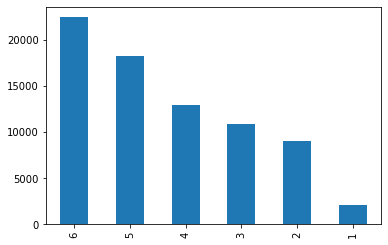

In [115]:
train_df["Year_Factor"].value_counts().plot(kind="bar")


#### Facility Type
##### Facility Type seems to have features with very few values. I set a threshold and labeled the features that has fewer values than the threshold as outliers.

In [116]:
fig = plt.figure(figsize = (500, 50))
train_df["facility_type"].value_counts().plot(kind="bar")
train_df["facility_type"].value_counts()

Multifamily_Uncategorized                    39455
Office_Uncategorized                         12512
Education_Other_classroom                     3860
Lodging_Hotel                                 2098
2to4_Unit_Building                            1893
Commercial_Other                              1744
5plus_Unit_Building                           1273
Warehouse_Nonrefrigerated                     1255
Retail_Uncategorized                          1130
Education_College_or_university               1056
Nursing_Home                                   772
Education_Uncategorized                        709
Mixed_Use_Commercial_and_Residential           672
Lodging_Dormitory_or_fraternity_sorority       669
Warehouse_Distribution_or_Shipping_center      604
Warehouse_Selfstorage                          577
Grocery_store_or_food_market                   448
Office_Medical_non_diagnostic                  447
Health_Care_Inpatient                          409
Religious_worship              

In [117]:
train_df["facility_type"].value_counts()<20
outliers=["Office_Mixed_use",
"Food_Service_Uncategorized",
"Food_Service_Other",
"Mixed_Use_Predominantly_Residential"
,"Public_Assembly_Stadium"
,"Service_Drycleaning_or_Laundry"
,"Lodging_Uncategorized"]

#### Building Class
##### There are only two features in building class. There are no outliers.

<AxesSubplot:>

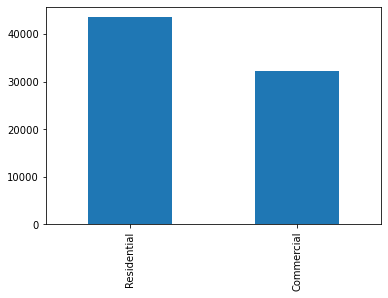

In [118]:
train_df["building_class"].value_counts().plot(kind="bar")


#### State Factor
##### State 10 has very few values when compared to the other states. We can say it is an outlier.

<AxesSubplot:>

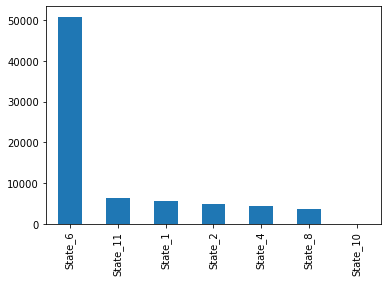

In [119]:
train_df["State_Factor"].value_counts().plot(kind="bar")


### Local Outlier Factor Outlier Detection
##### LOF calculates a score based on the similarity of a row with other rows. I determined a threshold by getting the 0.03 quantile of all of the scores. 

In [120]:
# fit the model for outlier detection (default)
LOF= LocalOutlierFactor(n_neighbors=6)


In [121]:
#dropna veri kaybına uğratıyor
LOF.fit_predict(train_df[num_list].dropna())

array([ 1,  1, -1, ...,  1,  1,  1])

In [122]:
all_scores=LOF.negative_outlier_factor_
thresh = np.quantile(all_scores, .03)
thresh

-2.043917146380631

In [123]:
all_scores[all_scores<thresh]

array([-2.73604555, -3.13552677, -2.94706366, -2.23097009, -3.24756136,
       -2.67298582, -2.0898928 , -2.68245229, -2.42828479, -2.54917447,
       -2.15676741, -2.12221925, -2.7016024 , -2.09608125, -2.91531852,
       -2.47321806, -2.58340614, -2.55059659, -2.16271285, -3.10323094,
       -2.47052169, -2.05832758, -2.51972049, -2.07569616, -2.16183283,
       -2.19422206, -2.93381836, -2.30563059, -4.33130869, -2.41512113,
       -2.30613458, -3.04840375, -2.73415431, -2.17904751, -2.57197174,
       -2.6848374 , -2.09826775, -2.4140101 , -2.88895751, -2.9438221 ,
       -2.93923285, -2.88995331, -2.44772194, -2.16454632, -3.13984635,
       -2.34487694, -2.33680327, -2.06119695, -2.22053772, -2.58947086,
       -2.62785743, -2.68295206, -2.37537885, -3.13153071, -2.27397389,
       -3.10715014, -2.19775856, -2.04651454, -2.2761188 , -2.10954859,
       -2.05768979, -2.3284035 , -2.75934869, -2.06132206, -2.35610696,
       -2.69563063, -2.52287321, -2.35005319, -2.70076326, -2.20

In [124]:
index = np.where(all_scores<thresh)
index

(array([    2,     3,    11,    12,    20,    25,    47,    65,    71,
           75,    83,    87,    90,    91,    95,   102,   108,   113,
          114,   116,   120,   123,   125,   127,   128,   129,   130,
          139,   140,   145,   156,   160,   166,   168,   170,   171,
          183,   189,   191,   202,   205,   208,   216,   220,   223,
          232,   233,   247,   248,   250,   253,   254,   261,   275,
          282,   284,   292,   298,   304,   306,   307,   308,   310,
          319,   321,   324,   327,   348,   363,   368,   373,   375,
          385,   389,   390,   391,   393,   403,   424,   432,   433,
          457,   467,   473,   593,   597,   640,   691,   720,   721,
          729,   743,   745,   746,   749,   762,   772,   801,   805,
          813,   814,   815,   817,   826,   828,   830,   836,   839,
          849,   855,   856,   860,   866,   884,   889,   904,   905,
          909,   925,   928,   930,   933,   941,   943,  1010,  1012,
      

### Missing Value Handling

In [147]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [148]:
import missingno as msno

<AxesSubplot:>

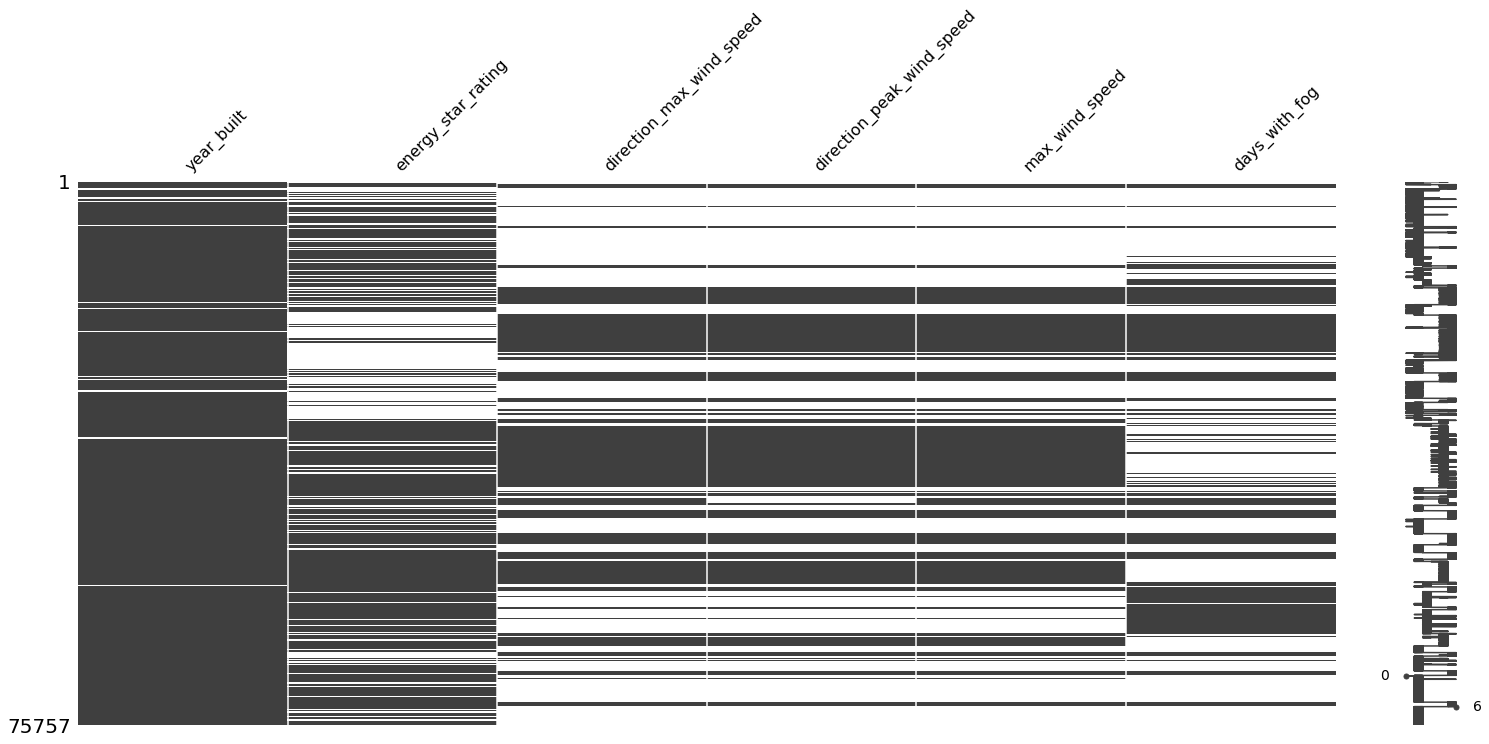

In [151]:
msno.matrix(train_df[null_values.index])

In [145]:
df_detailed(train_df).T

,days_with_fog,direction_peak_wind_speed,max_wind_speed,direction_max_wind_speed,energy_star_rating,year_built,Year_Factor,november_max_temp,cooling_degree_days,december_max_temp,...,may_max_temp,june_min_temp,june_avg_temp,june_max_temp,july_min_temp,july_avg_temp,july_max_temp,august_min_temp,august_avg_temp,id
Total Entry,29961,33946,34675,34675,49048,73920,75757,75757,75757,75757,...,75757,75757,75757,75757,75757,75757,75757,75757,75757,75757
Number of Missing Values,45796,41811,41082,41082,26709,1837,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Missing Value Ratio,60.451179,55.190939,54.228652,54.228652,35.256148,2.424858,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Data Type,float64,float64,float64,float64,float64,float64,object,int64,int64,int64,...,int64,int64,float64,int64,int64,float64,int64,int64,float64,int64
Unique Value Number,42,8,16,10,101,180,6,38,162,39,...,39,36,162,43,31,161,41,31,167,75757
Unique Values,"[nan, 12.0, 89.0, 88.0, 90.0, 104.0, 113.0, 18...","[1.0, nan, 270.0, 320.0, 340.0, 360.0, 330.0, ...","[1.0, nan, 12.5, 10.7, 13.4, 21.5, 16.5, 19.7,...","[1.0, nan, 270.0, 360.0, 300.0, 320.0, 330.0, ...","[11.0, 45.0, 97.0, 46.0, 100.0, nan, 56.0, 99....","[1942.0, 1955.0, 1951.0, 1980.0, 1985.0, 1956....","[1, 2, 3, 4, 5, 6]","[72, 90, 87, 91, 94, 84, 96, 95, 93, 83, 86, 8...","[115, 940, 899, 744, 4453, 2052, 2042, 1780, 1...","[71, 70, 82, 76, 79, 77, 73, 66, 69, 75, 59, 6...",...,"[84, 76, 72, 71, 112, 99, 87, 97, 83, 96, 98, ...","[50, 55, 59, 56, 60, 44, 58, 49, 51, 45, 48, 5...","[60.5, 64.01666667, 65.11666667, 64.3, 87.9833...","[90, 76, 74, 114, 99, 89, 96, 85, 109, 108, 10...","[52, 54, 62, 60, 67, 56, 58, 59, 57, 43, 53, 4...","[62.72580645, 66.40322581, 68.67741935, 67.580...","[84, 85, 81, 77, 116, 106, 93, 105, 92, 107, 1...","[52, 58, 65, 63, 77, 59, 66, 56, 55, 54, 60, 4...","[62.16129032, 73.09677419, 73.69354839, 72.903...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [144]:
null_values

,count
year_built,1837
energy_star_rating,26709
direction_max_wind_speed,41082
direction_peak_wind_speed,41811
max_wind_speed,41082
days_with_fog,45796


In [152]:
train_df[null_values.index].describe()

,year_built,energy_star_rating,direction_max_wind_speed,direction_peak_wind_speed,max_wind_speed,days_with_fog
count,73920.000000,49048.000000,34675.000000,33946.000000,34675.000000,29961.000000
mean,1952.306764,61.048605,66.552675,62.779974,4.190601,109.142051
std,37.053619,28.663683,131.147834,130.308106,6.458789,50.699751
min,0.000000,0.000000,1.000000,1.000000,1.000000,12.000000
25%,1927.000000,40.000000,1.000000,1.000000,1.000000,88.000000
50%,1951.000000,67.000000,1.000000,1.000000,1.000000,104.000000
75%,1977.000000,85.000000,1.000000,1.000000,1.000000,131.000000
max,2015.000000,100.000000,360.000000,360.000000,23.300000,311.000000


In [163]:
 dff["energy_star_rating"].fillna(dff["energy_star_rating"].mean(),inplace=True)

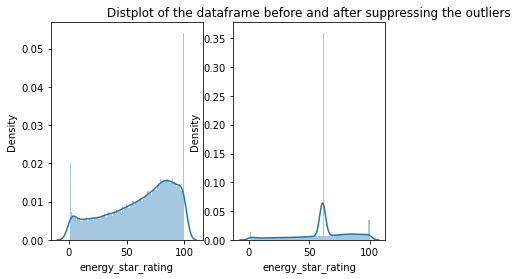

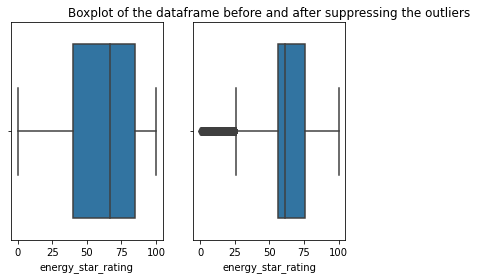

Description of the dataframe before suppressing outliers.
count    49048.000000
mean        61.048605
std         28.663683
min          0.000000
1%           1.000000
25%         40.000000
50%         67.000000
75%         85.000000
99%        100.000000
max        100.000000
Name: energy_star_rating, dtype: float64
Description of the dataframe after suppressing outliers.
count    75740.000000
mean        61.044826
std         23.065104
min          0.000000
1%           1.000000
25%         56.000000
50%         61.044826
75%         76.000000
99%        100.000000
max        100.000000
Name: energy_star_rating, dtype: float64


In [164]:
show_changes(train_df,dff,"energy_star_rating")

In [166]:
train_df.groupby(['site_eui'])['energy_star_rating'].mean().dropna()

site_eui
1.002998      100.0
1.090174      100.0
1.096995      100.0
1.105773      100.0
1.196721      100.0
              ...  
916.909240      1.0
935.389315     16.0
944.895706     94.0
962.241793      1.0
970.388586      1.0
Name: energy_star_rating, Length: 38625, dtype: float64

In [169]:
df_copy['energy_star_rating'].fillna(df_copy.groupby(['site_eui'])['energy_star_rating'].transform('mean'))

0         11.0
1         45.0
2         97.0
3         46.0
4        100.0
         ...  
75752      8.0
75753     98.0
75754      NaN
75755      NaN
75756     51.0
Name: energy_star_rating, Length: 75751, dtype: float64

In [179]:
df_copy["site_eui_quartiles"]=pd.qcut(train_df["site_eui"],50)

In [180]:
df_copy.groupby(['site_eui_quartiles'])['energy_star_rating'].mean()

site_eui_quartiles
(0.9999999999999999, 10.571]    93.904372
(10.571, 17.897]                90.317072
(17.897, 22.499]                87.077343
(22.499, 26.331]                83.181387
(26.331, 29.875]                80.583315
(29.875, 33.508]                79.004578
(33.508, 37.448]                78.338221
(37.448, 41.059]                78.602866
(41.059, 44.607]                79.409579
(44.607, 47.775]                78.812343
(47.775, 50.695]                77.791090
(50.695, 53.314]                77.700112
(53.314, 55.614]                77.495432
(55.614, 57.742]                77.034414
(57.742, 59.637]                76.927181
(59.637, 61.432]                74.733091
(61.432, 63.127]                74.529943
(63.127, 64.79]                 73.028794
(64.79, 66.351]                 72.431969
(66.351, 67.914]                71.540968
(67.914, 69.31]                 70.280215
(69.31, 70.806]                 69.262765
(70.806, 72.302]                67.720194
(72.302, 73.788

In [181]:
df_copy['energy_star_rating'].fillna(df_copy.groupby(['site_eui_quartiles'])['energy_star_rating'].transform('mean'),inplace=True)

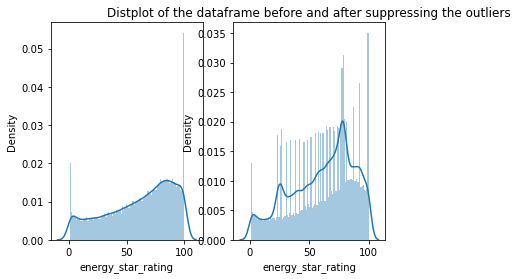

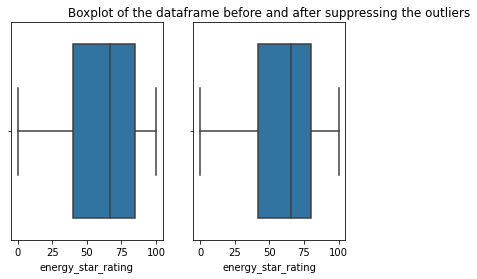

Description of the dataframe before suppressing outliers.
count    49048.000000
mean        61.048605
std         28.663683
min          0.000000
1%           1.000000
25%         40.000000
50%         67.000000
75%         85.000000
99%        100.000000
max        100.000000
Name: energy_star_rating, dtype: float64
Description of the dataframe after suppressing outliers.
count    75751.000000
mean        60.609078
std         26.016605
min          0.000000
1%           1.000000
25%         41.625078
50%         65.928356
75%         80.000000
99%        100.000000
max        100.000000
Name: energy_star_rating, dtype: float64


In [182]:
show_changes(train_df,df_copy,"energy_star_rating")

In [186]:
df_detailed(df_copy).T["energy_star_rating"]

Total Entry                                                             75751
Number of Missing Values                                                    0
Missing Value Ratio                                                       0.0
Data Type                                                             float64
Unique Value Number                                                       131
Unique Values               [11.0, 45.0, 97.0, 46.0, 100.0, 92.68489795918...
Name: energy_star_rating, dtype: object

In [188]:
df_copy.groupby(['site_eui_quartiles'])['year_built'].median()

site_eui_quartiles
(0.9999999999999999, 10.571]    1947.0
(10.571, 17.897]                1950.5
(17.897, 22.499]                1963.0
(22.499, 26.331]                1965.0
(26.331, 29.875]                1964.0
(29.875, 33.508]                1961.0
(33.508, 37.448]                1957.0
(37.448, 41.059]                1957.0
(41.059, 44.607]                1955.0
(44.607, 47.775]                1960.0
(47.775, 50.695]                1950.0
(50.695, 53.314]                1951.0
(53.314, 55.614]                1950.0
(55.614, 57.742]                1953.0
(57.742, 59.637]                1950.0
(59.637, 61.432]                1951.5
(61.432, 63.127]                1946.5
(63.127, 64.79]                 1941.0
(64.79, 66.351]                 1941.0
(66.351, 67.914]                1940.0
(67.914, 69.31]                 1940.0
(69.31, 70.806]                 1941.0
(70.806, 72.302]                1941.0
(72.302, 73.788]                1940.0
(73.788, 75.294]                1941.0
(75.29

In [189]:
train_df["year_built"].mean()

1952.306764069264

In [201]:
df_copy=train_df.copy()

In [202]:
df_copy.groupby(['Year_Factor'])['year_built'].mean()

Year_Factor
1    1943.582356
2    1947.380406
3    1949.330954
4    1950.912875
5    1954.794937
6    1955.102422
Name: year_built, dtype: float64

In [203]:
df_copy.groupby(['Year_Factor',"State_Factor"])['year_built'].mean()

Year_Factor  State_Factor
1            State_1         1943.304734
             State_2         1979.583333
             State_6         1943.372439
2            State_1         1939.635860
             State_2         1968.416667
             State_6         1947.868186
3            State_1         1938.377875
             State_10        1981.000000
             State_2         1971.703704
             State_6         1948.311946
             State_8         1957.524450
4            State_1         1937.723316
             State_10        1968.250000
             State_2         1967.338831
             State_4         1963.125000
             State_6         1949.137866
             State_8         1955.875309
5            State_1         1937.287437
             State_10        1968.250000
             State_11        1968.306679
             State_2         1968.263780
             State_4         1960.862637
             State_6         1949.075222
             State_8         19

In [204]:
df_copy['year_built'].fillna(df_copy.groupby(['Year_Factor',"State_Factor"])['year_built'].transform('mean'),inplace=True)

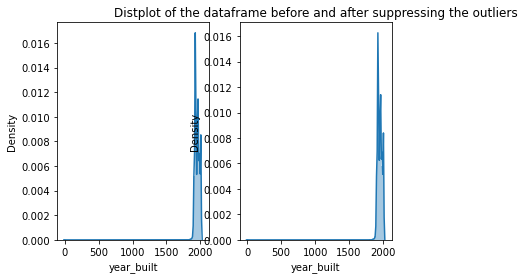

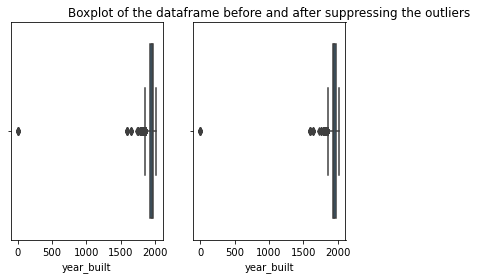

Description of the dataframe before suppressing outliers.
count    73920.000000
mean      1952.306764
std         37.053619
min          0.000000
1%        1895.000000
25%       1927.000000
50%       1951.000000
75%       1977.000000
99%       2013.000000
max       2015.000000
Name: year_built, dtype: float64
Description of the dataframe after suppressing outliers.
count    75757.000000
mean      1952.117814
std         36.641349
min          0.000000
1%        1895.000000
25%       1927.000000
50%       1950.000000
75%       1976.000000
99%       2013.000000
max       2015.000000
Name: year_built, dtype: float64


In [205]:
show_changes(train_df,df_copy,"year_built")

In [219]:
df_copy['direction_peak_wind_speed'].fillna(df_copy.groupby(["State_Factor"])["direction_peak_wind_speed"].transform('median'),inplace=True)

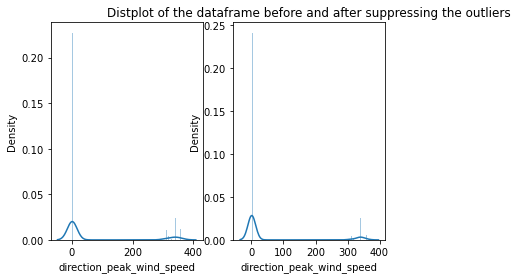

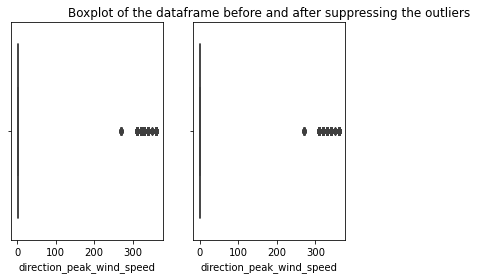

Description of the dataframe before suppressing outliers.
count    33946.000000
mean        62.779974
std        130.308106
min          1.000000
1%           1.000000
25%          1.000000
50%          1.000000
75%          1.000000
99%        360.000000
max        360.000000
Name: direction_peak_wind_speed, dtype: float64
Description of the dataframe after suppressing outliers.
count    75757.000000
mean        46.103027
std        114.846852
min          1.000000
1%           1.000000
25%          1.000000
50%          1.000000
75%          1.000000
99%        360.000000
max        360.000000
Name: direction_peak_wind_speed, dtype: float64


In [220]:
show_changes(train_df,df_copy,'direction_peak_wind_speed')

In [209]:
df_copy.groupby(["State_Factor"])['direction_peak_wind_speed'].median()

State_Factor
State_1       1.0
State_10    330.0
State_11      1.0
State_2       1.0
State_4     340.0
State_6       1.0
State_8       1.0
Name: direction_peak_wind_speed, dtype: float64

In [217]:
df_copy.groupby(["Year_Factor"])['direction_peak_wind_speed'].median()

Year_Factor
1      1.0
2      1.0
3      1.0
4      1.0
5    340.0
6      1.0
Name: direction_peak_wind_speed, dtype: float64

In [210]:
df_copy.groupby(["State_Factor"])['direction_max_wind_speed'].median()

State_Factor
State_1       1.0
State_10    350.0
State_11      1.0
State_2       1.0
State_4     330.0
State_6       1.0
State_8       1.0
Name: direction_max_wind_speed, dtype: float64

In [215]:
df_copy.groupby(["State_Factor","Year_Factor"])['max_wind_speed'].mean()

State_Factor  Year_Factor
State_1       1               1.000000
              2               1.000000
              3              15.203030
              4               1.000000
              5              17.000000
              6               1.000000
State_10      3              20.600000
              4                    NaN
              5              19.200000
              6               1.000000
State_11      5                    NaN
              6               1.000000
State_2       1                    NaN
              2                    NaN
              3                    NaN
              4               1.000000
              5                    NaN
              6               1.000000
State_4       4                    NaN
              5              17.400000
              6               1.000000
State_6       1               1.000000
              2               1.000000
              3               4.312937
              4               1.000000

In [214]:
df_copy.groupby(["State_Factor","Year_Factor"])['days_with_fog'].mean()

State_Factor  Year_Factor
State_1       1               12.000000
              2               88.003466
              3              107.000000
              4              118.750000
              5              113.000000
              6                     NaN
State_10      3               51.000000
              4                     NaN
              5              114.000000
              6              106.000000
State_11      5                     NaN
              6              261.000000
State_2       1                     NaN
              2                     NaN
              3                     NaN
              4              110.000000
              5                     NaN
              6              106.000000
State_4       4              292.701299
              5              148.873311
              6              205.072452
State_6       1               12.000000
              2               89.138272
              3               88.736003
              